In [1707]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
import sklearn
import itertools
import jellyfish

from nltk.metrics import distance
import gensim
# import Pycluster as PC

import requests
import bs4
from bs4 import BeautifulSoup
from wordcloud import WordCloud

from nltk.tokenize import sent_tokenize, word_tokenize

In [1708]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hoanglan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [1709]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('all')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hoanglan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/hoanglan/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/hoanglan/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/hoanglan/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/hoanglan/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars 

True

# CATEGORY

In [1710]:
#df with tokens 
df = pd.read_csv("/Users/hoanglan/Desktop/Lan/Side_Project/cleanded_data.csv", index_col=0).reset_index(drop=True)

In [1711]:
job_df = pd.read_csv("/Users/hoanglan/Desktop/Lan/Side_Project/19_Dec_data_with_note_trans.csv")

In [1712]:
job_df = job_df[['id','translated_value_2']]

In [1713]:
job_df_2 = pd.read_csv("/Users/hoanglan/Desktop/Lan/Side_Project/22_Dec_data_for_viz.csv")

In [1714]:
job_df = pd.merge(job_df_2,job_df, how='left', on='id')

In [1715]:
job_df = job_df[job_df['Note'] == 'old']

In [1716]:
job_df.head(1)

Unnamed: 0           id   post_date  \
0           0  Glints_1694  2023-02-15   

                                               title   title_final sub_group  \
0  Chuyên Viên Phân Tích/ Thống Kê (Senior Data A...  data analyst     DA/BI   

  group               salary  \
0  data  18000000 - None VND   

                                               skill  \
0   business data analyst, data analyst, data ana...   

                                         description  ...  portal  \
0  Chi tiết công việc Chuyên Viên Phân Tích/ Thốn...  ...  Glints   

  employer_scale country Min_convert Max_convert salary_convert average  \
0            NaN     NaN         0.0       774.0    0.0 - 774.0   774.0   

  new_group Note                                 translated_value_2  
0    0-1000  old  Job details of Senior Data Analyst at FSN JOIN...  

[1 rows x 27 columns]

In [1717]:
job_df = job_df.rename(columns={'translated_value_2':'translated_value'})

In [1718]:
final_df = job_df[['description','translated_value','title', 'title_final', 'sub_group', 'group', 'level', 'year_experience','location']].drop_duplicates()
final_df.reset_index(drop=True)

description  \
0    Chi tiết công việc Chuyên Viên Phân Tích/ Thốn...   
1    Chi tiết công việc BUSINESS ANALYST  tại Công ...   
2    Chi tiết công việc Business Analyst tại CÔNG T...   
3    Chi tiết công việc Business Analyst tại Med247...   
4    Chi tiết công việc Business Analyst tại Công t...   
..                                                 ...   
267  Đối tác của Navigos Search - Công ty mảng chứn...   
268  Description: We are looking for a Business Ana...   
269  Đến với Apec chúng tôi, nơi để bạn khẳng định ...   
270  - Export và xử lý dữ liệu bán hàng hàng ngày t...   
271  1. Báo cáo (20%) · Khai thác dữ liệu, xây dựng...   

                                      translated_value  \
0    Job details of Senior Data Analyst at FSN JOIN...   
1    BUSINESS ANALYST job details at ISOFHI Technol...   
2    Business Analyst job details at TINH VAN SOFTW...   
3    Business Analyst job details at Med247 JOB DES...   
4    Business Analyst job details at Gimasys VietNa...   
..                                                 ...   
267  Partner of Navigos Search - Securities company...   
268  Description: We are looking for a Business Ana...   
269  Come to us at Apec, a place for you to affirm ...   
270  - Export and process daily sales data from DMS...   
271  1. Reporting (20%) · Exploit data, build, upda...   

                                                 title       title_final  \
0    Chuyên Viên Phân Tích/ Thống Kê (Senior Data A...      data analyst   
1                                    BUSINESS ANALYST   business analyst   
2                                     Business Analyst  business analyst   
3                                     Business Analyst  business analyst   
4                                     Business Analyst  business analyst   
..                                                 ...               ...   
267               [Hà Nội] Business Analyst (Upto 40M)  business analyst   
268                           Business Analyst ($2500)  business analyst   
269  Business Analyst - Chuyên Viên Phân Tích Nghiệ...  business analyst   
270        Chuyên Viên Phân Tích Dữ Liệu/ Data Analyst      data analyst   
271  Chuyên Viên Phân Tích Dữ Liệu (Senior Data/bi ...      data analyst   

    sub_group group          level year_experience     location  
0       DA/BI  data        unknown          4 year  ho chi minh  
1          BA  data        unknown          2 year  ho chi minh  
2          BA  data        unknown          2 year  ho chi minh  
3          BA  data        unknown          2 year  ho chi minh  
4          BA  data        unknown          2 year  ho chi minh  
..        ...   ...            ...             ...          ...  
267        BA  data  general staff         unknown       ha noi  
268        BA  data  general staff         unknown       ha noi  
269        BA  data  general staff         unknown       ha noi  
270     DA/BI  data  general staff         unknown       ha noi  
271     DA/BI  data  general staff         unknown       ha noi  

[272 rows x 9 columns]

In [1719]:
final_df.sub_group.value_counts()

BA          144
DA/BI        60
DE           49
DS/ML/AI     19
Name: sub_group, dtype: int64

In [1720]:
df2 = df.rename(columns={'translated_value':'translated_token'})
df2.head(5)

description  \
0  MÔ TẢ CÔNG VIỆC\nNHÂN VIÊN KỸ THUẬT TRIỂN KHAI...   
1  MÔ TẢ CÔNG VIỆC\nTiếp nhận và quản lý, lập kế ...   
2  MÔ TẢ CÔNG VIỆC\n\n\nTiếp nhận yêu cầu từ PO, ...   
3  MÔ TẢ CÔNG VIỆC\n- Tiếp nhận hợp đồng từ Kinh ...   
4  MÔ TẢ CÔNG VIỆC\n- Làm việc với các stakeholde...   

                                    translated_token  
0  ['TECHNICAL STAFF DEPLOYING INTERNAL ERP SOFTW...  
1  ["RECEIVE, MANAGE, AND PLAN ALL CUSTOMER'S BUS...  
2  ['RECEIVE REQUESTS FROM PO, COMMUNICATE DIRECT...  
3  ['', " RECEIVE CONTRACTS FROM SALES, PLAN INST...  
4  ['', ' WORK WITH STAKEHOLDERS (PO, PRODUCT TEA...

In [1721]:
#merge with token df
final_df = pd.merge(
    job_df,
    df2,
    how="inner",
    on='description'
).drop_duplicates().reset_index(drop=True)
# final_df = final_df.loc[final_df.astype(str).drop_duplicates()]
# .reset_index(drop=True)
final_df.head(5)

Unnamed: 0           id   post_date  \
0           0  Glints_1694  2023-02-15   
1           1  Glints_1695  2023-03-23   
2           2  Glints_1696  2023-03-22   
3           3  Glints_1697  2023-03-10   
4           4  Glints_1698  2023-03-22   

                                               title       title_final  \
0  Chuyên Viên Phân Tích/ Thống Kê (Senior Data A...      data analyst   
1                                  BUSINESS ANALYST   business analyst   
2                                   Business Analyst  business analyst   
3                                   Business Analyst  business analyst   
4                                   Business Analyst  business analyst   

  sub_group group                   salary  \
0     DA/BI  data      18000000 - None VND   
1        BA  data            100 - 200 IDR   
2        BA  data            100 - 200 IDR   
3        BA  data  10000000 - 27000000 VND   
4        BA  data           800 - 1500 SGD   

                                               skill  \
0   business data analyst, data analyst, data ana...   
1           business analyst, perfomance testing,emr   
2                            nan,nan,nan,nan,english   
3                writing skills,logical thinking,nan   
4   good communication skills, quality control,da...   

                                         description  ... employer_scale  \
0  Chi tiết công việc Chuyên Viên Phân Tích/ Thốn...  ...            NaN   
1  Chi tiết công việc BUSINESS ANALYST  tại Công ...  ...            NaN   
2  Chi tiết công việc Business Analyst tại CÔNG T...  ...            NaN   
3  Chi tiết công việc Business Analyst tại Med247...  ...            NaN   
4  Chi tiết công việc Business Analyst tại Công t...  ...            NaN   

  country Min_convert Max_convert  salary_convert average new_group Note  \
0     NaN         0.0       774.0     0.0 - 774.0   774.0    0-1000  old   
1     NaN       100.0       200.0   100.0 - 200.0   150.0    0-1000  old   
2     NaN       100.0       200.0   100.0 - 200.0   150.0    0-1000  old   
3     NaN       430.0      1161.0  430.0 - 1161.0   795.5    0-1000  old   
4     NaN       600.0      1125.0  600.0 - 1125.0   862.5    0-1000  old   

                                    translated_value  \
0  Job details of Senior Data Analyst at FSN JOIN...   
1  BUSINESS ANALYST job details at ISOFHI Technol...   
2  Business Analyst job details at TINH VAN SOFTW...   
3  Business Analyst job details at Med247 JOB DES...   
4  Business Analyst job details at Gimasys VietNa...   

                                    translated_token  
0  ['JOB DETAILS OF SENIOR DATA ANALYST AT FSN JO...  
1  ["BUSINESS ANALYST JOB DETAILS AT ISOFHI TECHN...  
2  ['BUSINESS ANALYST JOB DETAILS AT TINH VAN SOF...  
3  ["BUSINESS ANALYST JOB DETAILS AT MED247  PART...  
4  ["BUSINESS ANALYST JOB DETAILS AT GIMASYS VIET...  

[5 rows x 28 columns]

In [1722]:
final_df.columns

Index(['Unnamed: 0', 'id', 'post_date', 'title', 'title_final', 'sub_group',
       'group', 'salary', 'skill', 'description', 'requirement', 'benefit',
       'location', 'level', 'year_experience', 'employer', 'employer_domain',
       'portal', 'employer_scale', 'country', 'Min_convert', 'Max_convert',
       'salary_convert', 'average', 'new_group', 'Note', 'translated_value',
       'translated_token'],
      dtype='object')

In [1723]:
# final_df = final_df.rename(columns={'translated_value_2':'translated_value'})

In [1724]:
final_df.columns

Index(['Unnamed: 0', 'id', 'post_date', 'title', 'title_final', 'sub_group',
       'group', 'salary', 'skill', 'description', 'requirement', 'benefit',
       'location', 'level', 'year_experience', 'employer', 'employer_domain',
       'portal', 'employer_scale', 'country', 'Min_convert', 'Max_convert',
       'salary_convert', 'average', 'new_group', 'Note', 'translated_value',
       'translated_token'],
      dtype='object')

In [1725]:
len(final_df)

270

In [1726]:
# final_df = job_df.copy()

In [1727]:
# df = pd.read_csv("/Users/hoanglan/Desktop/Lan/Side_Project/data_1971_resubgroup.csv", index_col=0).reset_index(drop=True)
# df_translated = pd.read_csv("/Users/hoanglan/Desktop/Lan/Side_Project/final_translation.csv", index_col=0).reset_index(drop=True)
# df_translated = df_translated[['id', 'description_final', 'requirement_final', 'benefit_final']]
# df_translated.columns

In [1728]:
# df_or = pd.read_csv("/Users/hoanglan/Desktop/Lan/Side_Project/combined_data.csv", index_col=0).reset_index(drop=True)
# df_or.head(5)

### JD CATEGORIES

* Customer's business requirements (C)
    * Analyze
    * Fulfill ad hoc data requests
* Data (D)
    * Analyze
    * Collect
    * Integrate
    * Maintain pipeline
* Reports (R)
    * Prepare
* Bridge btw teams (B)
    * 

'C': ['customer', 'business', 'requirements', 'days off'], \
'D': ['data', 'analyze', 'collect', 'integrate', 'integration', 'pipeline'], \
'R': ['report', 'reports', 'prepare'], \
'B': ['bridge']
        

## CREATE BOW

In [1729]:
# create bag of words 
def createBoW(text):
    text = text.lower()
    for p in string.punctuation:
        text = text.replace(p, "")

    text = text.split(" ")
    new_text = [word for word in text if word not in stopwords.words('english')]
    return new_text

In [1730]:
# apply text-processing for the whole datset
final_df['translated_token'] = final_df['translated_token'].astype(str)
final_df['bow'] = final_df['translated_token'].apply(lambda x: createBoW(x))
final_df.head(5)

Unnamed: 0           id   post_date  \
0           0  Glints_1694  2023-02-15   
1           1  Glints_1695  2023-03-23   
2           2  Glints_1696  2023-03-22   
3           3  Glints_1697  2023-03-10   
4           4  Glints_1698  2023-03-22   

                                               title       title_final  \
0  Chuyên Viên Phân Tích/ Thống Kê (Senior Data A...      data analyst   
1                                  BUSINESS ANALYST   business analyst   
2                                   Business Analyst  business analyst   
3                                   Business Analyst  business analyst   
4                                   Business Analyst  business analyst   

  sub_group group                   salary  \
0     DA/BI  data      18000000 - None VND   
1        BA  data            100 - 200 IDR   
2        BA  data            100 - 200 IDR   
3        BA  data  10000000 - 27000000 VND   
4        BA  data           800 - 1500 SGD   

                                               skill  \
0   business data analyst, data analyst, data ana...   
1           business analyst, perfomance testing,emr   
2                            nan,nan,nan,nan,english   
3                writing skills,logical thinking,nan   
4   good communication skills, quality control,da...   

                                         description  ... country Min_convert  \
0  Chi tiết công việc Chuyên Viên Phân Tích/ Thốn...  ...     NaN         0.0   
1  Chi tiết công việc BUSINESS ANALYST  tại Công ...  ...     NaN       100.0   
2  Chi tiết công việc Business Analyst tại CÔNG T...  ...     NaN       100.0   
3  Chi tiết công việc Business Analyst tại Med247...  ...     NaN       430.0   
4  Chi tiết công việc Business Analyst tại Công t...  ...     NaN       600.0   

  Max_convert  salary_convert average new_group Note  \
0       774.0     0.0 - 774.0   774.0    0-1000  old   
1       200.0   100.0 - 200.0   150.0    0-1000  old   
2       200.0   100.0 - 200.0   150.0    0-1000  old   
3      1161.0  430.0 - 1161.0   795.5    0-1000  old   
4      1125.0  600.0 - 1125.0   862.5    0-1000  old   

                                    translated_value  \
0  Job details of Senior Data Analyst at FSN JOIN...   
1  BUSINESS ANALYST job details at ISOFHI Technol...   
2  Business Analyst job details at TINH VAN SOFTW...   
3  Business Analyst job details at Med247 JOB DES...   
4  Business Analyst job details at Gimasys VietNa...   

                                    translated_token  \
0  ['JOB DETAILS OF SENIOR DATA ANALYST AT FSN JO...   
1  ["BUSINESS ANALYST JOB DETAILS AT ISOFHI TECHN...   
2  ['BUSINESS ANALYST JOB DETAILS AT TINH VAN SOF...   
3  ["BUSINESS ANALYST JOB DETAILS AT MED247  PART...   
4  ["BUSINESS ANALYST JOB DETAILS AT GIMASYS VIET...   

                                                 bow  
0  [job, details, senior, data, analyst, fsn, joi...  
1  [business, analyst, job, details, isofhi, tech...  
2  [business, analyst, job, details, tinh, van, s...  
3  [business, analyst, job, details, med247, , pa...  
4  [business, analyst, job, details, gimasys, vie...  

[5 rows x 29 columns]

In [1731]:
pd.Series(list(itertools.chain(*list(final_df['bow'].values)))).value_counts().keys().tolist()

['',
 'data',
 'business',
 'requirements',
 'product',
 'team',
 'work',
 'development',
 'support',
 'system',
 'experience',
 'analysis',
 'design',
 'software',
 'management',
 'solutions',
 'analyze',
 'project',
 'working',
 'documents',
 '•',
 'user',
 'process',
 'technology',
 'skills',
 'develop',
 'analyst',
 'participate',
 'build',
 'company',
 'salary',
 'using',
 'products',
 'customers',
 'information',
 'reports',
 'systems',
 'based',
 'testing',
 'insurance',
 'quality',
 'projects',
 'according',
 'knowledge',
 'new',
 'processes',
 'research',
 'customer',
 'use',
 'related',
 'building',
 'ensure',
 'manage',
 'needs',
 'tools',
 'job',
 'training',
 'benefits',
 'year',
 'understand',
 'technical',
 'provide',
 'bonus',
 'users',
 'stakeholders',
 'test',
 'end',
 'departments',
 'ability',
 'internal',
 'models',
 'perform',
 'functional',
 'create',
 'collect',
 'health',
 'implement',
 'write',
 'teams',
 'annual',
 'tasks',
 'professional',
 'coordinate',
 'e

In [1732]:
final_df['translated_value'] = final_df['translated_value'].astype(str)

In [1733]:
# tokenize
final_df['tokens'] = final_df['translated_value'].apply(lambda x: sent_tokenize(x, language='english'))
data = list(itertools.chain(*final_df['tokens'].tolist()))
token_df = pd.DataFrame({'sent_token': data})

In [1734]:
final_df['num_tokens'] = final_df['tokens'].apply(lambda x: len(x))
final_df['num_tokens'].describe()

count    270.000000
mean       5.988889
std        4.759247
min        1.000000
25%        2.000000
50%        5.000000
75%        8.000000
max       24.000000
Name: num_tokens, dtype: float64

In [1735]:
final_df.head(1)

Unnamed: 0           id   post_date  \
0           0  Glints_1694  2023-02-15   

                                               title   title_final sub_group  \
0  Chuyên Viên Phân Tích/ Thống Kê (Senior Data A...  data analyst     DA/BI   

  group               salary  \
0  data  18000000 - None VND   

                                               skill  \
0   business data analyst, data analyst, data ana...   

                                         description  ... Max_convert  \
0  Chi tiết công việc Chuyên Viên Phân Tích/ Thốn...  ...       774.0   

  salary_convert average new_group Note  \
0    0.0 - 774.0   774.0    0-1000  old   

                                    translated_value  \
0  Job details of Senior Data Analyst at FSN JOIN...   

                                    translated_token  \
0  ['JOB DETAILS OF SENIOR DATA ANALYST AT FSN JO...   

                                                 bow  \
0  [job, details, senior, data, analyst, fsn, joi...   

                                              tokens num_tokens  
0  [Job details of Senior Data Analyst at FSN JOI...         15  

[1 rows x 31 columns]

In [1736]:
final_df['tokens'].iloc[2]

['Business Analyst job details at TINH VAN SOFTWARE TECHNOLOGY JOINT STOCK COMPANY - Receive, survey, collect requests from partners and users, analyze requirements and data, describe business processes, use cases, scenarios, business analysis, and processes to provide business, interface and feature requirements.',
 '- Design data models, create mockups or prototypes for the project.',
 '- Implement documentation Review operations.',
 '- Optimize business flows and processes - Report to project leader, or direct management level - Participate in software quality testing, product acceptance before transfer.']

### Long token length

In [1737]:
def count_length_token(tokens):
    length = []
    for token in tokens:
        length.append(len(token))
    return length

final_df['token_length'] = final_df['tokens'].apply(lambda x: count_length_token(x))

In [1738]:
def more_200_char(tokens):
    output = 0
    for tk in tokens:
        if tk > 200:
            output = 1
            break
    return output

final_df['more_200_char'] = final_df['token_length'].apply(lambda x: more_200_char(x))
df_contain_token_more_200_chars = final_df.loc[final_df['more_200_char'] == 1]
df_not_contain_token_more_200_chars = final_df.loc[final_df['more_200_char'] == 0]

#### By dash

In [1739]:
def split_by_dash(tokens):
    new_tokens = []
    for tk in tokens:
        new_tokens = new_tokens + re.split("-", tk)
    return new_tokens

df_contain_token_more_200_chars['benefit_sent_tokens_2'] = df_contain_token_more_200_chars['tokens'].apply(lambda x: split_by_dash(x))
df_contain_token_more_200_chars['token_length_2'] = df_contain_token_more_200_chars['benefit_sent_tokens_2'].apply(lambda x: count_length_token(x))
df_contain_token_more_200_chars['num_tokens_2'] = df_contain_token_more_200_chars['benefit_sent_tokens_2'].apply(lambda x: len(x))

In [1740]:
df_contain_token_more_200_chars = df_contain_token_more_200_chars.drop(columns = ['tokens','num_tokens','token_length','more_200_char'])
df_contain_token_more_200_chars.head(1)

Unnamed: 0           id   post_date  \
0           0  Glints_1694  2023-02-15   

                                               title   title_final sub_group  \
0  Chuyên Viên Phân Tích/ Thống Kê (Senior Data A...  data analyst     DA/BI   

  group               salary  \
0  data  18000000 - None VND   

                                               skill  \
0   business data analyst, data analyst, data ana...   

                                         description  ... salary_convert  \
0  Chi tiết công việc Chuyên Viên Phân Tích/ Thốn...  ...    0.0 - 774.0   

  average new_group Note                                   translated_value  \
0   774.0    0-1000  old  Job details of Senior Data Analyst at FSN JOIN...   

                                    translated_token  \
0  ['JOB DETAILS OF SENIOR DATA ANALYST AT FSN JO...   

                                                 bow  \
0  [job, details, senior, data, analyst, fsn, joi...   

                               benefit_sent_tokens_2  \
0  [Job details of Senior Data Analyst at FSN JOI...   

                                      token_length_2 num_tokens_2  
0  [153, 94, 89, 40, 280, 155, 186, 51, 118, 28, ...           19  

[1 rows x 32 columns]

In [1741]:
df_contain_token_more_200_chars = df_contain_token_more_200_chars.rename(columns={"benefit_sent_tokens_2": "tokens", "token_length_2": "token_length", "num_tokens_2": "num_tokens"})
df_contain_token_more_200_chars.head(1)

Unnamed: 0           id   post_date  \
0           0  Glints_1694  2023-02-15   

                                               title   title_final sub_group  \
0  Chuyên Viên Phân Tích/ Thống Kê (Senior Data A...  data analyst     DA/BI   

  group               salary  \
0  data  18000000 - None VND   

                                               skill  \
0   business data analyst, data analyst, data ana...   

                                         description  ... salary_convert  \
0  Chi tiết công việc Chuyên Viên Phân Tích/ Thốn...  ...    0.0 - 774.0   

  average new_group Note                                   translated_value  \
0   774.0    0-1000  old  Job details of Senior Data Analyst at FSN JOIN...   

                                    translated_token  \
0  ['JOB DETAILS OF SENIOR DATA ANALYST AT FSN JO...   

                                                 bow  \
0  [job, details, senior, data, analyst, fsn, joi...   

                                              tokens  \
0  [Job details of Senior Data Analyst at FSN JOI...   

                                        token_length num_tokens  
0  [153, 94, 89, 40, 280, 155, 186, 51, 118, 28, ...         19  

[1 rows x 32 columns]

In [1742]:
df_contain_token_more_200_chars['more_200_char'] = df_contain_token_more_200_chars['token_length'].apply(lambda x: more_200_char(x))
df_contain_token_more_200_chars.head(1)

Unnamed: 0           id   post_date  \
0           0  Glints_1694  2023-02-15   

                                               title   title_final sub_group  \
0  Chuyên Viên Phân Tích/ Thống Kê (Senior Data A...  data analyst     DA/BI   

  group               salary  \
0  data  18000000 - None VND   

                                               skill  \
0   business data analyst, data analyst, data ana...   

                                         description  ... average new_group  \
0  Chi tiết công việc Chuyên Viên Phân Tích/ Thốn...  ...   774.0    0-1000   

  Note                                   translated_value  \
0  old  Job details of Senior Data Analyst at FSN JOIN...   

                                    translated_token  \
0  ['JOB DETAILS OF SENIOR DATA ANALYST AT FSN JO...   

                                                 bow  \
0  [job, details, senior, data, analyst, fsn, joi...   

                                              tokens  \
0  [Job details of Senior Data Analyst at FSN JOI...   

                                        token_length num_tokens more_200_char  
0  [153, 94, 89, 40, 280, 155, 186, 51, 118, 28, ...         19             1  

[1 rows x 33 columns]

In [1743]:
df_contain_token_more_200_chars_2 = df_contain_token_more_200_chars.loc[df_contain_token_more_200_chars['more_200_char'] == 1]
df_not_contain_token_more_200_chars_2 = df_contain_token_more_200_chars.loc[df_contain_token_more_200_chars['more_200_char'] == 0]

In [1744]:
len(df_not_contain_token_more_200_chars_2)

47

In [1745]:
len(df_not_contain_token_more_200_chars)

47

In [1746]:
df_not_contain_token_more_200_chars = pd.concat([df_not_contain_token_more_200_chars, df_not_contain_token_more_200_chars_2])

#### By \n

In [1747]:
def split_by_n(tokens):
    new_tokens = []
    for tk in tokens:
        new_tokens = new_tokens + re.split("\n", tk)
    return new_tokens

df_contain_token_more_200_chars_2['benefit_sent_tokens_2'] = df_contain_token_more_200_chars_2['tokens'].apply(lambda x: split_by_n(x))
df_contain_token_more_200_chars_2['token_length_2'] = df_contain_token_more_200_chars_2['benefit_sent_tokens_2'].apply(lambda x: count_length_token(x))
df_contain_token_more_200_chars_2['num_tokens_2'] = df_contain_token_more_200_chars_2['benefit_sent_tokens_2'].apply(lambda x: len(x))

In [1748]:
df_contain_token_more_200_chars_2 = df_contain_token_more_200_chars_2.drop(columns = ['tokens','num_tokens','token_length','more_200_char'])
df_contain_token_more_200_chars_2 = df_contain_token_more_200_chars_2.rename(columns={"benefit_sent_tokens_2": "tokens", "token_length_2": "token_length", "num_tokens_2": "num_tokens"})
df_contain_token_more_200_chars_2['more_200_char'] = df_contain_token_more_200_chars_2['token_length'].apply(lambda x: more_200_char(x))
df_contain_token_more_200_chars_2.head(1)

Unnamed: 0           id   post_date  \
0           0  Glints_1694  2023-02-15   

                                               title   title_final sub_group  \
0  Chuyên Viên Phân Tích/ Thống Kê (Senior Data A...  data analyst     DA/BI   

  group               salary  \
0  data  18000000 - None VND   

                                               skill  \
0   business data analyst, data analyst, data ana...   

                                         description  ... average new_group  \
0  Chi tiết công việc Chuyên Viên Phân Tích/ Thốn...  ...   774.0    0-1000   

  Note                                   translated_value  \
0  old  Job details of Senior Data Analyst at FSN JOIN...   

                                    translated_token  \
0  ['JOB DETAILS OF SENIOR DATA ANALYST AT FSN JO...   

                                                 bow  \
0  [job, details, senior, data, analyst, fsn, joi...   

                                              tokens  \
0  [Job details of Senior Data Analyst at FSN JOI...   

                                        token_length num_tokens more_200_char  
0  [153, 94, 89, 40, 280, 155, 186, 51, 118, 28, ...         19             1  

[1 rows x 33 columns]

In [1749]:
df_contain_token_more_200_chars_3 = df_contain_token_more_200_chars_2.loc[df_contain_token_more_200_chars_2['more_200_char'] == 1]
df_not_contain_token_more_200_chars_3 = df_contain_token_more_200_chars_2.loc[df_contain_token_more_200_chars_2['more_200_char'] == 0]

In [1750]:
df_not_contain_token_more_200_chars = pd.concat([df_not_contain_token_more_200_chars, df_not_contain_token_more_200_chars_3])
len(df_not_contain_token_more_200_chars)

96

In [1751]:
def more_250_char(tokens):
    output = 0
    for tk in tokens:
        if tk > 250:
            output = 1
            break
    return output

In [1752]:
df_contain_token_more_200_chars_3['more_250_char'] = df_contain_token_more_200_chars_3['token_length'].apply(lambda x: more_250_char(x))

In [1753]:
df_contain_token_more_300_chars = df_contain_token_more_200_chars_3.loc[df_contain_token_more_200_chars_3['more_250_char'] == 1]
df_not_contain_token_more_300_chars = df_contain_token_more_200_chars_3.loc[df_contain_token_more_200_chars_3['more_250_char'] == 0]

In [1754]:
df_not_contain_token_more_200_chars = pd.concat([df_not_contain_token_more_200_chars, df_not_contain_token_more_300_chars])

In [1755]:
len(df_not_contain_token_more_200_chars)

114

In [1756]:
len(df_contain_token_more_300_chars)

156

In [1757]:
df_contain_token_more_300_chars

Unnamed: 0                id   post_date  \
0             0       Glints_1694  2023-02-15   
1             1       Glints_1695  2023-03-23   
3             3       Glints_1697  2023-03-10   
4             4       Glints_1698  2023-03-22   
5            12       Glints_1706  2023-03-22   
..          ...               ...         ...   
261         267  VietnamWork_1961  2023-03-13   
262         268  VietnamWork_1962  2023-03-07   
263         269  VietnamWork_1963  2023-03-13   
265         271  VietnamWork_1965  2023-02-27   
268         274  VietnamWork_1968  2023-03-03   

                                                 title  \
0    Chuyên Viên Phân Tích/ Thống Kê (Senior Data A...   
1                                    BUSINESS ANALYST    
3                                     Business Analyst   
4                                     Business Analyst   
5                                     Business Analyst   
..                                                 ...   
261      Data Manager (Data, ETL & Project Management)   
262                           HO - IT Business Analyst   
263  [Da Nang - Onsite] [$900-$1500] Business Analy...   
265       Business Analyst (BA) | Lương Upto 30M + KPI   
268  Business Analyst - Chuyên Viên Phân Tích Nghiệ...   

                    title_final sub_group group                   salary  \
0                  data analyst     DA/BI  data      18000000 - None VND   
1              business analyst        BA  data            100 - 200 IDR   
3              business analyst        BA  data  10000000 - 27000000 VND   
4              business analyst        BA  data           800 - 1500 SGD   
5              business analyst        BA  data            100 - 200 IDR   
..                          ...       ...   ...                      ...   
261                data manager     DA/BI  data            $2000 - $4000   
262      ho it business analyst        BA  data                 Từ $1000   
263            business analyst        BA  data             $900 - $1500   
265  business analyst lương kpi        BA  data                Tới $1300   
268            business analyst        BA  data             $700 - $1200   

                                                 skill  \
0     business data analyst, data analyst, data ana...   
1             business analyst, perfomance testing,emr   
3                  writing skills,logical thinking,nan   
4     good communication skills, quality control,da...   
5            crm, good communication skills,salesforce   
..                                                 ...   
261   computer science, engineering, project manage...   
262   agile development, business analysis,system b...   
263              business analyst ba,japanese,japanese   
265   business analysis, product launch, prototype ...   
268   analyst skill, business analysis,business ana...   

                                           description  ...  new_group Note  \
0    Chi tiết công việc Chuyên Viên Phân Tích/ Thốn...  ...     0-1000  old   
1    Chi tiết công việc BUSINESS ANALYST  tại Công ...  ...     0-1000  old   
3    Chi tiết công việc Business Analyst tại Med247...  ...     0-1000  old   
4    Chi tiết công việc Business Analyst tại Công t...  ...     0-1000  old   
5    Chi tiết công việc Business Analyst tại Công t...  ...     0-1000  old   
..                                                 ...  ...        ...  ...   
261  *Location job at Quy Nhon, Binh Dinh * We are ...  ...  2501-3000  old   
262  Business Analyst is responsible for ensuring b...  ...     0-1000  old   
263  No.281 ● 仕様マネジメント ○ クライアントとチームと共に仕様を検討/提案/策定する...  ...  1001-1500  old   
265  MÔ TẢ CÔNG VIỆC • Tiếp nhận các yêu cầu về phá...  ...  1001-1500  old   
268  Đến với Apec chúng tôi, nơi để bạn khẳng định ...  ...     0-1000  old   

                                      translated_value  \
0    Job details of Senior Data Analyst at FSN JOIN...   
1    BUSINESS ANALYST job details at ISOFHI 

#### By Capital Letters 

In [1758]:
def flatgen(nested_object):
    for item in nested_object:
        #   will flatten lists, tuples and sets
        #   will not operate on string, dictionary
        if isinstance(item, (list, tuple, set)):
            yield from flatgen(item)
        else:
            yield item

In [1759]:
def split_by_cl(tokens):
    new_tokens = []
    # for token in tokens:
    #     if len(token) > 300:
    #         new_tokens = new_tokens + [s for s in re.split("([A-Z][^A-Z]*)", token) if s]
    # length = token + new_tokens
    for i in range(len(tokens)):
        if len(tokens[i]) > 300:
            tokens[i] = [s for s in re.split("([A-Z][^A-Z]*)", tokens[i]) if s]

    fgen = flatgen(tokens)
    flatlist = list(fgen)
            
    return flatlist

In [1760]:
df_contain_token_more_300_chars['benefit_sent_tokens_2'] = df_contain_token_more_300_chars['tokens'].apply(lambda x: split_by_cl(x))

In [1761]:
df_contain_token_more_300_chars['token_length_2'] = df_contain_token_more_300_chars['benefit_sent_tokens_2'].apply(lambda x: count_length_token(x))
df_contain_token_more_300_chars['num_tokens_2'] = df_contain_token_more_300_chars['benefit_sent_tokens_2'].apply(lambda x: len(x))

In [1762]:
df_contain_token_more_300_chars = df_contain_token_more_300_chars.drop(columns = ['tokens','num_tokens','token_length','more_200_char','more_250_char'])
df_contain_token_more_300_chars = df_contain_token_more_300_chars.rename(columns={"benefit_sent_tokens_2": "tokens", "token_length_2": "token_length", "num_tokens_2": "num_tokens"})
df_contain_token_more_300_chars.head(1)

Unnamed: 0           id   post_date  \
0           0  Glints_1694  2023-02-15   

                                               title   title_final sub_group  \
0  Chuyên Viên Phân Tích/ Thống Kê (Senior Data A...  data analyst     DA/BI   

  group               salary  \
0  data  18000000 - None VND   

                                               skill  \
0   business data analyst, data analyst, data ana...   

                                         description  ... salary_convert  \
0  Chi tiết công việc Chuyên Viên Phân Tích/ Thốn...  ...    0.0 - 774.0   

  average new_group Note                                   translated_value  \
0   774.0    0-1000  old  Job details of Senior Data Analyst at FSN JOIN...   

                                    translated_token  \
0  ['JOB DETAILS OF SENIOR DATA ANALYST AT FSN JO...   

                                                 bow  \
0  [job, details, senior, data, analyst, fsn, joi...   

                                              tokens  \
0  [Job details of Senior Data Analyst at FSN JOI...   

                                        token_length num_tokens  
0  [153, 94, 89, 40, 280, 155, 186, 51, 118, 28, ...         51  

[1 rows x 32 columns]

In [1763]:
def more_300_char(tokens):
    output = 0
    for tk in tokens:
        if tk > 300:
            output = 1
            break
    return output

In [1764]:
df_contain_token_more_300_chars['more_300_char'] = df_contain_token_more_300_chars['token_length'].apply(lambda x: more_300_char(x))

In [1765]:
df_contain_token_more_300_chars_2 = df_contain_token_more_300_chars.loc[df_contain_token_more_300_chars['more_300_char'] == 1]
df_not_contain_token_more_300_chars_2 = df_contain_token_more_300_chars.loc[df_contain_token_more_300_chars['more_300_char'] == 0]

In [1766]:
cleaned_df = pd.concat([df_not_contain_token_more_200_chars, df_contain_token_more_300_chars])

In [1767]:
df_contain_token_more_300_chars_2

Unnamed: 0                id   post_date           title     title_final  \
229         235  VietnamWork_1929  2022-12-19  Data Scientist  data scientist   

    sub_group group        salary  \
229  DS/ML/AI  data  $700 - $2000   

                                                 skill  \
229   hadoop, machine learning, matlab, python,data...   

                                           description  ... average  \
229  As a Data Scientist, you will implement machin...  ...  1350.0   

     new_group Note                                   translated_value  \
229  1001-1500  old  As a Data Scientist, you will implement machin...   

                                      translated_token  \
229  ['AS A DATA SCIENTIST, YOU WILL IMPLEMENT MACH...   

                                                   bow  \
229  [data, scientist, implement, machine, learning...   

                                                tokens  \
229  [As a Data Scientist, you will implement machi...   

                                          token_length num_tokens  \
229  [149, 308, 1, 1, 45, 17, 110, 0, 80, 0, 57, 0,...         35   

    more_300_char  
229             1  

[1 rows x 33 columns]

In [1768]:
cleaned_df.head(5)

Unnamed: 0           id   post_date  \
27          27  Glints_1721  2022-11-29   
48          48  Glints_1742  2023-03-16   
73          73  Glints_1767  2023-03-21   
81          81  ITViec_1775  2023-03-07   
82          82  ITViec_1776  2023-03-06   

                                                title             title_final  \
27  Nhân viên/chuyên viên Business Analyst và Lập ...        business analyst   
48                                   Business Analyst        business analyst   
73              IT Business Analyst (Fulltime-Onsite)     it business analyst   
81                            Middle Business Analyst        business analyst   
82  [Senior/Junior] IT Business Analyst / BA (+2 y...  it business analyst ba   

   sub_group group                   salary  \
27        BA  data            100 - 200 IDR   
48        BA  data  16000000 - 38000000 VND   
73        BA  data  12000000 - 30000000 VND   
81        BA  data        1,200 - 1,500 USD   
82        BA  data        1,200 - 2,200 USD   

                                                skill  \
27   data analysis, it support,computer science,na...   
48                     business analyst, drawio,figma   
73   analytical skills, business analyst, dfd, nos...   
81                 erp, system admin,business analyst   
82                     agile,english,business analyst   

                                          description  ... Note  \
27  Chi tiết công việc Nhân viên/chuyên viên Busin...  ...  old   
48  Chi tiết công việc Business Analyst tại Công T...  ...  old   
73  Chi tiết công việc IT Business Analyst (Fullti...  ...  old   
81  Analyzes user and business requirements to cre...  ...  old   
82  Discuss with product team to analyze and under...  ...  old   

                                     translated_value  \
27  Job details Business Analyst and Programmer at...   
48  Business Analyst job details at Lifesup Techno...   
73  Job details of IT Business Analyst (Fulltime-O...   
81  Analyzes user and business requirements to cre...   
82  Discuss with product team to analyze and under...   

                                     translated_token  \
27  ['JOB DETAILS BUSINESS ANALYST AND PROGRAMMER ...   
48  ['BUSINESS ANALYST JOB DETAILS AT LIFESUP TECH...   
73  ['JOB DETAILS OF IT BUSINESS ANALYST (FULLTIME...   
81  ['ANALYZES USER AND BUSINESS REQUIREMENTS TO C...   
82  ['DISCUSS WITH PRODUCT TEAM TO ANALYZE AND UND...   

                                                  bow  \
27  [job, details, business, analyst, programmer, ...   
48  [business, analyst, job, details, lifesup, tec...   
73  [job, details, business, analyst, fulltime, on...   
81  [analyzes, user, business, requirements, creat...   
82  [discuss, product, team, analyze, understand, ...   

                                               tokens num_tokens  \
27  [Job details Business Analyst and Programmer a...          3   
48  [Business Analyst job details at Lifesup Techn...          5   
73  [Job details of IT Business Analyst (Fulltime-...         11   
81  [Analyzes user and business requirements to cr...          6   
82  [Discuss with product team to analyze and unde...          8   

                                     token_length more_200_char more_250_char  \
27                                   [198, 1, 77]           0.0           NaN   
48                         [72, 58, 114, 65, 159]           0.0           NaN   
73  [172, 77, 94, 64, 82, 55, 63, 68, 70, 61, 81]           0.0           NaN   
81                       [90, 75, 76, 87, 66, 34]           0.0           NaN   
82            [80, 102, 50, 144, 168, 72, 45, 72]           0.0           NaN   

   more_300_char  
27           NaN  
48           NaN  
73           NaN  
81           NaN  
82           NaN  

[5 rows x 35 columns]

In [1769]:
len(cleaned_df)

270

In [1770]:
df_test = pd.DataFrame()
for i in cleaned_df.translated_value.unique().tolist():
    cleaned_df2 = cleaned_df[cleaned_df['translated_value'] == i]
    token_df = pd.DataFrame({'token': list(itertools.chain(*cleaned_df2['tokens'].tolist()))})
    token_df['des'] = str(cleaned_df2['translated_value'].values[0])
    df_test = pd.concat([df_test, token_df], ignore_index=True)

In [1771]:
cleaned_df.head(2)

Unnamed: 0           id   post_date  \
27          27  Glints_1721  2022-11-29   
48          48  Glints_1742  2023-03-16   

                                                title       title_final  \
27  Nhân viên/chuyên viên Business Analyst và Lập ...  business analyst   
48                                   Business Analyst  business analyst   

   sub_group group                   salary  \
27        BA  data            100 - 200 IDR   
48        BA  data  16000000 - 38000000 VND   

                                                skill  \
27   data analysis, it support,computer science,na...   
48                     business analyst, drawio,figma   

                                          description  ... Note  \
27  Chi tiết công việc Nhân viên/chuyên viên Busin...  ...  old   
48  Chi tiết công việc Business Analyst tại Công T...  ...  old   

                                     translated_value  \
27  Job details Business Analyst and Programmer at...   
48  Business Analyst job details at Lifesup Techno...   

                                     translated_token  \
27  ['JOB DETAILS BUSINESS ANALYST AND PROGRAMMER ...   
48  ['BUSINESS ANALYST JOB DETAILS AT LIFESUP TECH...   

                                                  bow  \
27  [job, details, business, analyst, programmer, ...   
48  [business, analyst, job, details, lifesup, tec...   

                                               tokens num_tokens  \
27  [Job details Business Analyst and Programmer a...          3   
48  [Business Analyst job details at Lifesup Techn...          5   

              token_length more_200_char more_250_char more_300_char  
27            [198, 1, 77]           0.0           NaN           NaN  
48  [72, 58, 114, 65, 159]           0.0           NaN           NaN  

[2 rows x 35 columns]

In [1772]:
df_test

token  \
0     Job details Business Analyst and Programmer at...   
1                                                     .   
2     )02 Business Analyst - Trainee 10 High Technic...   
3     Business Analyst job details at Lifesup Techno...   
4     Learn, collect and analyze customer business r...   
...                                                 ...   
6557   Design sample interfaces (prototype/mockup/wi...   
6558   Support Devs and Testers in the product devel...   
6559   Construction User manuals and user training (...   
6560   Coordinate with design, programming, testing ...   
6561          Implement Other tasks from direct manager   

                                                    des  
0     Job details Business Analyst and Programmer at...  
1     Job details Business Analyst and Programmer at...  
2     Job details Business Analyst and Programmer at...  
3     Business Analyst job details at Lifesup Techno...  
4     Business Analyst job details at Lifesup Techno...  
...                                                 ...  
6557  Come to us at Apec, a place for you to affirm ...  
6558  Come to us at Apec, a place for you to affirm ...  
6559  Come to us at Apec, a place for you to affirm ...  
6560  Come to us at Apec, a place for you to affirm ...  
6561  Come to us at Apec, a place for you to affirm ...  

[6562 rows x 2 columns]

In [1773]:
df_test.des.nunique()

259

In [1774]:
final_df_lda = df_test.drop_duplicates()

In [1775]:
# final_df_lda.to_csv('/Users/hoanglan/Desktop/Lan/Side_Project/final_df_lda.csv') 

## Class

In [1776]:
class_encoding = {
    'Clients': 'C',
    'Data': 'D',
    'Products and Production Processes': 'P',
    'Reporting': 'R',
    'Solution Design': 'S',
    'Communication': 'B',
    'Training and other tasks': 'O'
}

class_dict = pd.DataFrame({'jd': list(class_encoding.keys()), 'code': list(class_encoding.values()) })
class_dict.loc[class_dict['code'].str.contains("C"), 'jd_group'] = 'Clients'
class_dict.loc[class_dict['code'].str.contains("D"), 'jd_group'] = 'Data'
class_dict.loc[class_dict['code'].str.contains("P"), 'jd_group'] = 'Products and Production Processes'
class_dict.loc[class_dict['code'].str.contains("R"), 'jd_group'] = 'Reporting'
class_dict.loc[class_dict['code'].str.contains("S"), 'jd_group'] = 'Solution Design'
class_dict.loc[class_dict['code'].str.contains("B"), 'jd_group'] = 'Communication'
class_dict.loc[class_dict['code'].str.contains("O"), 'jd_group'] = 'Training and other tasks'
class_dict

jd code                           jd_group
0                            Clients    C                            Clients
1                               Data    D                               Data
2  Products and Production Processes    P  Products and Production Processes
3                          Reporting    R                          Reporting
4                    Solution Design    S                    Solution Design
5                      Communication    B                      Communication
6           Training and other tasks    O           Training and other tasks

In [1777]:
#divide into small groups
ba_group = cleaned_df[cleaned_df['sub_group'] == 'BA']
de_group = cleaned_df[cleaned_df['sub_group'] == 'DE']
da_bi_group = cleaned_df[cleaned_df['sub_group'] == 'DA/BI']
ds_ml_ai_group = cleaned_df[cleaned_df['sub_group'] == 'DS/ML/AI']

In [1778]:
token_df_ba_group = pd.DataFrame({'token': list(itertools.chain(*ba_group['tokens'].tolist()))})
token_df_de_group = pd.DataFrame({'token': list(itertools.chain(*de_group['tokens'].tolist()))})
token_df_da_bi_group = pd.DataFrame({'token': list(itertools.chain(*da_bi_group['tokens'].tolist()))})
token_df_ds_ml_ai_group = pd.DataFrame({'token': list(itertools.chain(*ds_ml_ai_group['tokens'].tolist()))})

In [1779]:
class_label = {class_dict.iloc[i]['code']: [] for i in range(0, len(class_dict))}

def append_label(original_label: dict, appended_label: dict):
    updated_label = original_label
    
    # append new label
    for k, v in appended_label.items():
        try:
            if type(v) is list:
                updated_label[k] = updated_label[k] + v
            else:
                updated_label[k] = updated_label[k] + [v]
        except:
            print("There is no class called", k)
    
    # drop duplicates
    for k, v in updated_label.items():
        updated_label[k] = pd.Series(v).unique().tolist()

    return updated_label

In [1780]:
def classify_jd(text, class_dict):
    output = {}
    for code, vals in class_dict.items():
        vals_found = []
        for v in vals:
            if v in text:
                vals_found.append(v)
        if len(vals_found) > 0:
            output[code] = vals_found
    if len(output) > 0:
        return output
    else:
        return None

In [1781]:
label_ver1 = append_label(class_label, {
                'C': ['customer', 'business', 'requirements', 'stakeholder', 'client', 'support users', 'business analysis', 'request', 'user requirement'], \
                'D': ['data', 'analyze data', 'collect', 'integrate', 'integration', 'pipeline',
                         'model', 'models'], \
                'P': ['prototype', 'mockup', 'wireframe', 'product', 'demo', 'guide', 'mock-ups', 
                            'products', 'instructions', 'instruction', 'feature', 'features', 'version', 'wireframes'
                            'tester', 'test', 'check', 'quality control', 'analyze product', 'system', 'qa', 'project', 'product development', 'software'], \
                'R': ['report', 'reports', 'prepare', 'document', 'documentaion', 'manual', 'manuals'], \
                'S': ['solution', 'solutions'], \
                'B': ['bridge', 'acting as a', 'communicate', 'work directly', 'act as', 'work with', 'coordinate with', 'cooperate with'], \
                'O': ['other', 'support', 'training', 'task', 'tasks'] 
                })
label_ver1

{'C': ['customer',
  'business',
  'requirements',
  'stakeholder',
  'client',
  'support users',
  'business analysis',
  'request',
  'user requirement'],
 'D': ['data',
  'analyze data',
  'collect',
  'integrate',
  'integration',
  'pipeline',
  'model',
  'models'],
 'P': ['prototype',
  'mockup',
  'wireframe',
  'product',
  'demo',
  'guide',
  'mock-ups',
  'products',
  'instructions',
  'instruction',
  'feature',
  'features',
  'version',
  'wireframestester',
  'test',
  'check',
  'quality control',
  'analyze product',
  'system',
  'qa',
  'project',
  'product development',
  'software'],
 'R': ['report',
  'reports',
  'prepare',
  'document',
  'documentaion',
  'manual',
  'manuals'],
 'S': ['solution', 'solutions'],
 'B': ['bridge',
  'acting as a',
  'communicate',
  'work directly',
  'act as',
  'work with',
  'coordinate with',
  'cooperate with'],
 'O': ['other', 'support', 'training', 'task', 'tasks']}

In [1782]:
def jd_list(class_):
    global class_dict

    jd_code = list(class_.keys())
    jd = class_dict.loc[class_dict['code'].isin(jd_code)]['jd'].tolist()
    jd_group = class_dict.loc[class_dict['code'].isin(jd_code)]['jd_group'].tolist()
    
    return jd, jd_group

### All Group

In [1783]:
all_group = pd.DataFrame({'token': list(itertools.chain(*cleaned_df['tokens'].tolist()))})

In [1784]:
all_group['class'] = all_group['token'].apply(lambda x: classify_jd(x.lower(), label_ver1))

In [1785]:
label_all_group = all_group.loc[all_group['class'].notna()]
label_all_group['jd'] = label_all_group['class'].apply(lambda x: jd_list(x)[0])
label_all_group['jd_group'] = label_all_group['class'].apply(lambda x: jd_list(x)[1])

In [1786]:
test = label_all_group.merge(df_test, how='left', on='token')
test.head(10)
df2 = test.groupby('des')['jd'].apply(list).reset_index(name="new_col")
df2['unique_class'] = ''
for i in range(len(df2)):
    abc = df2.new_col[i]
    result = list({x for l in abc for x in l})
    df2['unique_class'][i] = result
df2.head(1)

des  \
0  "Mcredit - When You Need It! Mcredit - Nice to...   

                                             new_col  \
0  [[Clients], [Training and other tasks], [Data,...   

                                        unique_class  
0  [Products and Production Processes, Solution D...

In [1787]:
df2 = df2.rename(columns={'des':'translated_value'})

In [1788]:
df = cleaned_df.merge(df2, how='left', on='translated_value')

In [1789]:
df

Unnamed: 0                id   post_date  \
0            27       Glints_1721  2022-11-29   
1            48       Glints_1742  2023-03-16   
2            73       Glints_1767  2023-03-21   
3            81       ITViec_1775  2023-03-07   
4            82       ITViec_1776  2023-03-06   
..          ...               ...         ...   
265         267  VietnamWork_1961  2023-03-13   
266         268  VietnamWork_1962  2023-03-07   
267         269  VietnamWork_1963  2023-03-13   
268         271  VietnamWork_1965  2023-02-27   
269         274  VietnamWork_1968  2023-03-03   

                                                 title  \
0    Nhân viên/chuyên viên Business Analyst và Lập ...   
1                                     Business Analyst   
2                IT Business Analyst (Fulltime-Onsite)   
3                              Middle Business Analyst   
4    [Senior/Junior] IT Business Analyst / BA (+2 y...   
..                                                 ...   
265      Data Manager (Data, ETL & Project Management)   
266                           HO - IT Business Analyst   
267  [Da Nang - Onsite] [$900-$1500] Business Analy...   
268       Business Analyst (BA) | Lương Upto 30M + KPI   
269  Business Analyst - Chuyên Viên Phân Tích Nghiệ...   

                    title_final sub_group group                   salary  \
0              business analyst        BA  data            100 - 200 IDR   
1              business analyst        BA  data  16000000 - 38000000 VND   
2           it business analyst        BA  data  12000000 - 30000000 VND   
3              business analyst        BA  data        1,200 - 1,500 USD   
4        it business analyst ba        BA  data        1,200 - 2,200 USD   
..                          ...       ...   ...                      ...   
265                data manager     DA/BI  data            $2000 - $4000   
266      ho it business analyst        BA  data                 Từ $1000   
267            business analyst        BA  data             $900 - $1500   
268  business analyst lương kpi        BA  data                Tới $1300   
269            business analyst        BA  data             $700 - $1200   

                                                 skill  \
0     data analysis, it support,computer science,na...   
1                       business analyst, drawio,figma   
2     analytical skills, business analyst, dfd, nos...   
3                   erp, system admin,business analyst   
4                       agile,english,business analyst   
..                                                 ...   
265   computer science, engineering, project manage...   
266   agile development, business analysis,system b...   
267              business analyst ba,japanese,japanese   
268   business analysis, product launch, prototype ...   
269   analyst skill, business analysis,business ana...   

                                           description  ...  \
0    Chi tiết công việc Nhân viên/chuyên viên Busin...  ...   
1    Chi tiết công việc Business Analyst tại Công T...  ...   
2    Chi tiết công việc IT Business Analyst (Fullti...  ...   
3    Analyzes user and business requirements to cre...  ...   
4    Discuss with product team to analyze and under...  ...   
..                                                 ...  ...   
265  *Location job at Quy Nhon, Binh Dinh * We are ...  ...   
266  Business Analyst is responsible for ensuring b...  ...   
267  No.281 ● 仕様マネジメント ○ クライアントとチームと共に仕様を検討/提案/策定する...  ...   
268  MÔ TẢ CÔNG VIỆC • Tiếp nhận các yêu cầu về phá...  ...   
269  Đến với Apec chúng tôi, nơi để bạn khẳng định ...  ...   

                                      translated_token  \
0    ['JOB DETAILS BUSINESS ANALYST AND PROGRAMMER ...   
1    ['BUSINESS ANALYST JOB DETAILS AT LIFESUP TECH...   
2    ['JOB DETAILS OF IT BUSINESS ANALYST (FULLTIME...   
3    ['ANALYZES USER AND BUSINESS REQUIREMENTS TO C...   
4    ['DISCUSS WITH PRODUCT TEAM TO ANALYZE AND UND...   
..  

In [1790]:
df_2 = df.loc[df['unique_class'].notna()]
df_2 = list(itertools.chain(*df_2['unique_class'].tolist()))

In [1791]:
df_2 = pd.Series(df_2).value_counts().to_frame(name='number_of_posts').reset_index()
df_2 = df_2.rename(columns={'index' : 'category'})
df_2

category  number_of_posts
0  Products and Production Processes              254
1                            Clients              242
2           Training and other tasks              207
3                               Data              203
4                          Reporting              200
5                      Communication              138
6                    Solution Design              120

In [1792]:
df_2['category'] = df_2['category'].replace(['Clients'], 'External Works')


In [1793]:
df_2['category'] = df_2['category'].replace(['Communication'], 'Internal Communication')

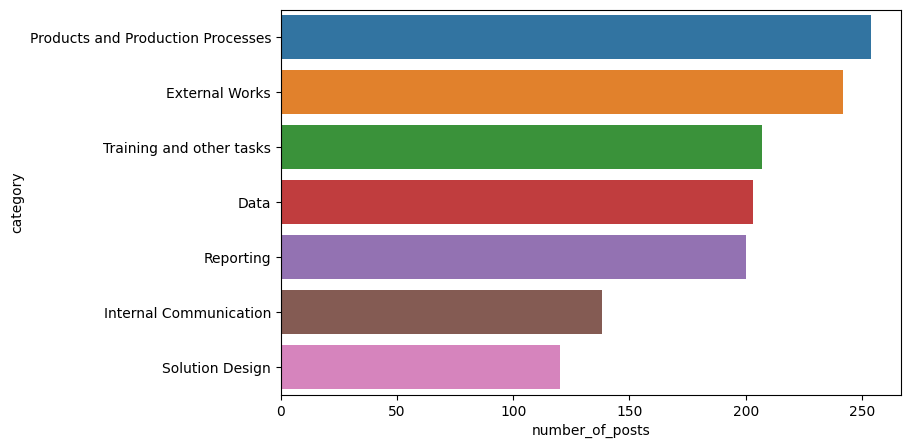

In [1794]:
plt.figure(figsize=(8,5))
ax = sns.barplot(df_2,x='number_of_posts',y='category')
# for i in ax.containers:
#     ax.bar_label(i, fmt='%.1f')                
# plt.title('Distribution of category per job')
plt.xlabel('number_of_posts')
plt.show()

In [1795]:
ba_group = df[df['sub_group'] == 'BA']
ba_group = ba_group.loc[ba_group['unique_class'].notna()]

In [1796]:
ba_group_list = list(itertools.chain(*ba_group['unique_class'].tolist()))
ba_group_list = pd.Series(ba_group_list).value_counts().to_frame(name='number_of_posts').reset_index()
ba_group_list = ba_group_list.rename(columns={'index' : 'category'})
ba_group_list['sub_group'] = 'BA'
ba_group_list

category  number_of_posts sub_group
0                            Clients              142        BA
1  Products and Production Processes              141        BA
2                          Reporting              118        BA
3           Training and other tasks              114        BA
4                      Communication               94        BA
5                               Data               82        BA
6                    Solution Design               62        BA

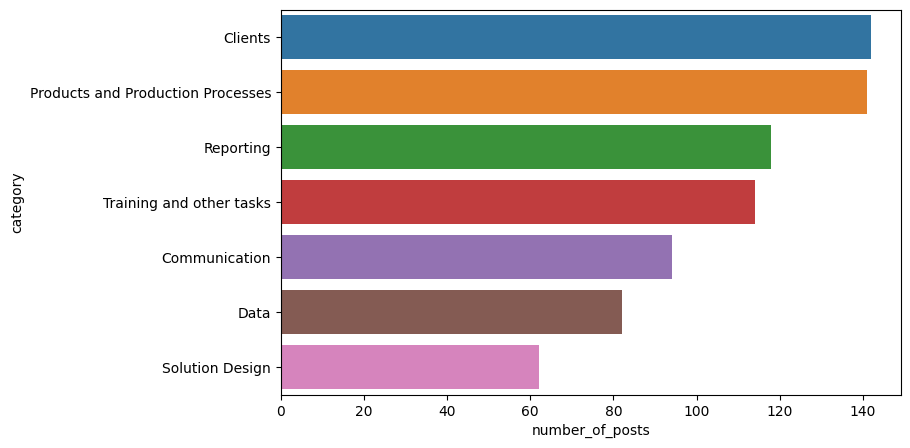

In [1797]:
plt.figure(figsize=(8,5))
ax = sns.barplot(ba_group_list,x='number_of_posts',y='category')
# for i in ax.containers:
#     ax.bar_label(i, fmt='%.1f')                
# plt.title('Distribution of category per job')
plt.xlabel('number_of_posts')
plt.show()

In [1798]:
dabi_group = df[df['sub_group'] == 'DA/BI']
dabi_group = dabi_group.loc[dabi_group['unique_class'].notna()]

In [1799]:
dabi_group_list = list(itertools.chain(*dabi_group['unique_class'].tolist()))
dabi_group_list = pd.Series(dabi_group_list).value_counts().to_frame(name='number_of_posts').reset_index()
dabi_group_list = dabi_group_list.rename(columns={'index' : 'category'})
dabi_group_list['sub_group'] = 'DA/BI'
dabi_group_list

category  number_of_posts sub_group
0                               Data               57     DA/BI
1  Products and Production Processes               51     DA/BI
2                            Clients               51     DA/BI
3                          Reporting               49     DA/BI
4           Training and other tasks               48     DA/BI
5                    Solution Design               24     DA/BI
6                      Communication               24     DA/BI

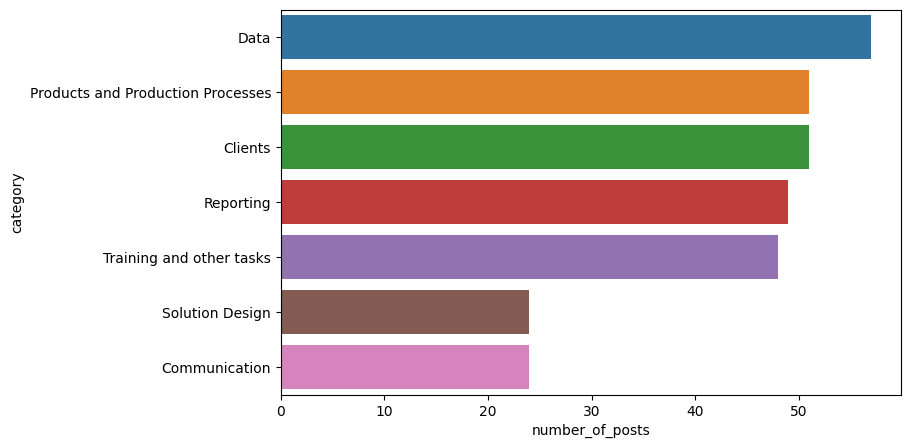

In [1800]:
plt.figure(figsize=(8,5))
ax = sns.barplot(dabi_group_list,x='number_of_posts',y='category')
# for i in ax.containers:
#     ax.bar_label(i, fmt='%.1f')                
# plt.title('Distribution of category per job')
plt.xlabel('number_of_posts')
plt.show()

In [1801]:
de_group = df[df['sub_group'] == 'DE']
de_group = de_group.loc[de_group['unique_class'].notna()]

In [1802]:
de_group_list = list(itertools.chain(*de_group['unique_class'].tolist()))
de_group_list = pd.Series(de_group_list).value_counts().to_frame(name='number_of_posts').reset_index()
de_group_list = de_group_list.rename(columns={'index' : 'category'})
de_group_list['sub_group'] = 'DE'
de_group_list

category  number_of_posts sub_group
0  Products and Production Processes               46        DE
1                               Data               46        DE
2                            Clients               33        DE
3           Training and other tasks               33        DE
4                          Reporting               28        DE
5                    Solution Design               23        DE
6                      Communication               15        DE

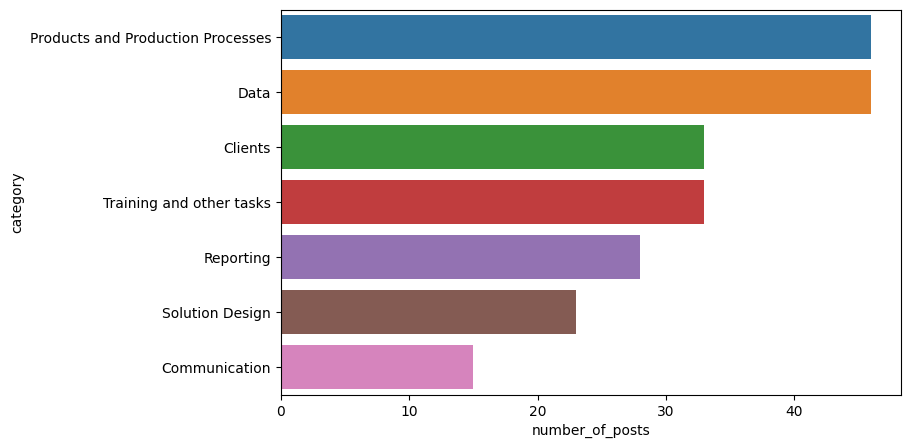

In [1803]:
plt.figure(figsize=(8,5))
ax = sns.barplot(de_group_list,x='number_of_posts',y='category')
# for i in ax.containers:
#     ax.bar_label(i, fmt='%.1f')                
# plt.title('Distribution of category per job')
plt.xlabel('number_of_posts')
plt.show()

In [1804]:
ds_ml_ai_group = df[df['sub_group'] == 'DS/ML/AI']
ds_ml_ai_group = ds_ml_ai_group.loc[ds_ml_ai_group['unique_class'].notna()]

In [1805]:
ds_ml_ai_group_list = list(itertools.chain(*ds_ml_ai_group['unique_class'].tolist()))
ds_ml_ai_group_list = pd.Series(ds_ml_ai_group_list).value_counts().to_frame(name='number_of_posts').reset_index()
ds_ml_ai_group_list = ds_ml_ai_group_list.rename(columns={'index' : 'category'})
ds_ml_ai_group_list['sub_group'] = 'DS/ML/AI'
ds_ml_ai_group_list

category  number_of_posts sub_group
0                               Data               18  DS/ML/AI
1                            Clients               16  DS/ML/AI
2  Products and Production Processes               16  DS/ML/AI
3           Training and other tasks               12  DS/ML/AI
4                    Solution Design               11  DS/ML/AI
5                      Communication                5  DS/ML/AI
6                          Reporting                5  DS/ML/AI

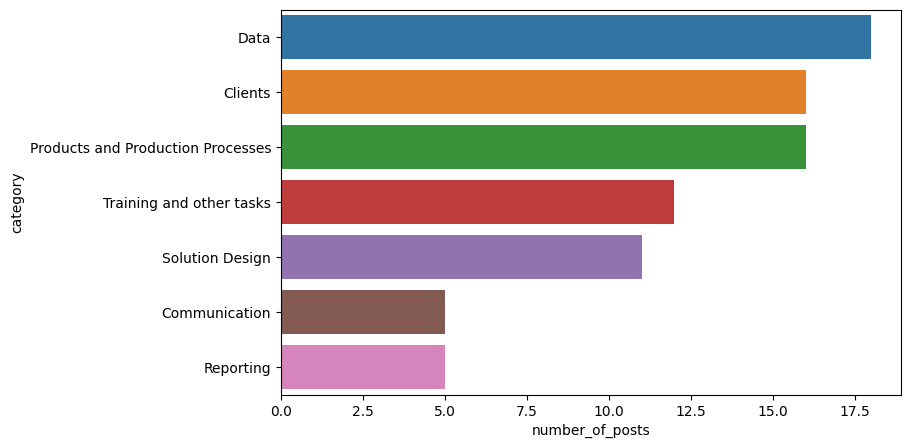

In [1806]:
plt.figure(figsize=(8,5))
ax = sns.barplot(ds_ml_ai_group_list,x='number_of_posts',y='category')
# for i in ax.containers:
#     ax.bar_label(i, fmt='%.1f')                
# plt.title('Distribution of category per job')
plt.xlabel('number_of_posts')
plt.show()

In [1807]:
all_list = pd.concat([ba_group_list,dabi_group_list,de_group_list,ds_ml_ai_group_list])
all_list

category  number_of_posts sub_group
0                            Clients              142        BA
1  Products and Production Processes              141        BA
2                          Reporting              118        BA
3           Training and other tasks              114        BA
4                      Communication               94        BA
5                               Data               82        BA
6                    Solution Design               62        BA
0                               Data               57     DA/BI
1  Products and Production Processes               51     DA/BI
2                            Clients               51     DA/BI
3                          Reporting               49     DA/BI
4           Training and other tasks               48     DA/BI
5                    Solution Design               24     DA/BI
6                      Communication               24     DA/BI
0  Products and Production Processes               46        DE
1                               Data               46        DE
2                            Clients               33        DE
3           Training and other tasks               33        DE
4                          Reporting               28        DE
5                    Solution Design               23        DE
6                      Communication               15        DE
0                               Data               18  DS/ML/AI
1                            Clients               16  DS/ML/AI
2  Products and Production Processes               16  DS/ML/AI
3           Training and other tasks               12  DS/ML/AI
4                    Solution Design               11  DS/ML/AI
5                      Communication                5  DS/ML/AI
6                          Reporting                5  DS/ML/AI

In [1808]:
all_list['category'] = all_list['category'].replace(['Clients'], 'Working with Clients')

In [1809]:
all_list

category  number_of_posts sub_group
0               Working with Clients              142        BA
1  Products and Production Processes              141        BA
2                          Reporting              118        BA
3           Training and other tasks              114        BA
4                      Communication               94        BA
5                               Data               82        BA
6                    Solution Design               62        BA
0                               Data               57     DA/BI
1  Products and Production Processes               51     DA/BI
2               Working with Clients               51     DA/BI
3                          Reporting               49     DA/BI
4           Training and other tasks               48     DA/BI
5                    Solution Design               24     DA/BI
6                      Communication               24     DA/BI
0  Products and Production Processes               46        DE
1                               Data               46        DE
2               Working with Clients               33        DE
3           Training and other tasks               33        DE
4                          Reporting               28        DE
5                    Solution Design               23        DE
6                      Communication               15        DE
0                               Data               18  DS/ML/AI
1               Working with Clients               16  DS/ML/AI
2  Products and Production Processes               16  DS/ML/AI
3           Training and other tasks               12  DS/ML/AI
4                    Solution Design               11  DS/ML/AI
5                      Communication                5  DS/ML/AI
6                          Reporting                5  DS/ML/AI

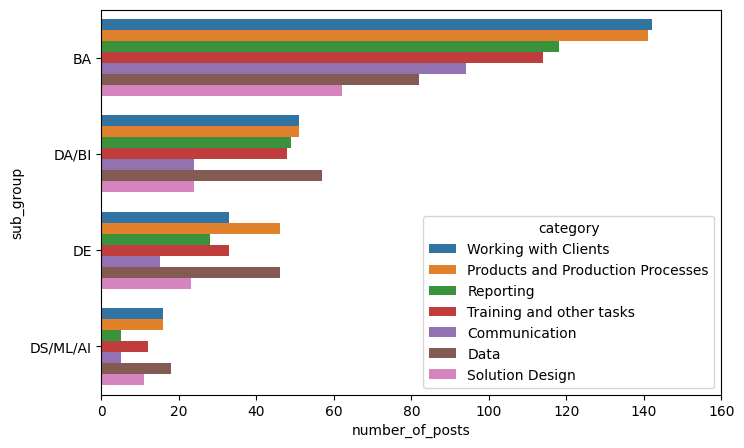

In [1810]:
plt.figure(figsize=(8,5))
ax = sns.barplot(all_list,x='number_of_posts',y='sub_group',hue='category')
# for i in ax.containers:
#     ax.bar_label(i, fmt='%.1f')                
# plt.title('Distribution of category per job')
plt.xlabel('number_of_posts')
plt.xlim(0,160)
plt.show()

In [1811]:
# Level
level_df = df.loc[df['level'].notna()]
level_df = df.loc[df['unique_class'].notna()]
# level_df = list(itertools.chain(*level_df['unique_class'].tolist()))
# level_df = pd.Series(level_df).value_counts().to_frame(name='number_of_posts').reset_index()
# ba_group_list = ba_group_list.rename(columns={'index' : 'category'})
# ba_group_list['sub_group'] = 'BA'
# ba_group_list

In [1812]:
#unknown: not incl
#general staff: yr of exp (fresher < 1yr, 1,2,3: jun, 4: sen)
# unknown in yr exp: keep as general staff
#team leader: incl head of dep
#jun->gen->sen->head
df.level.value_counts()

unknown                             134
general staff                       113
team leader                           6
junior,senior                         4
junior                                4
head of department                    4
team leader,junior,senior             1
team leader,general staff             1
fresher,junior                        1
senior                                1
general staff,head of department      1
Name: level, dtype: int64

In [1813]:
level_df['level'] = level_df['level'].replace(['fresher,junior'], 'fresher')
level_df['level'] = level_df['level'].replace(['general staff,head of department'], 'general staff')
level_df['level'] = level_df['level'].replace(['team leader,general staff'], 'general staff')
level_df['level'] = level_df['level'].replace(['team leader,junior,senior'], 'junior')
level_df['level'] = level_df['level'].replace(['head of department'], 'team leader')
level_df['level'] = level_df['level'].replace(['junior,senior'], 'junior')

In [1814]:
level_df.level.value_counts()

unknown          134
general staff    113
team leader       10
junior             9
fresher            1
senior             1
Name: level, dtype: int64

In [1815]:
level_df.year_experience.value_counts()

unknown                99
2 year                 79
1 year                 34
4 year                 22
3 year                 22
under 1 year            9
5 year                  2
under 1 year,1 year     1
Name: year_experience, dtype: int64

In [1816]:
conditions = [
    (level_df['level'] == 'general staff') & (level_df['year_experience'] == 'unknown'),
    (level_df['level'] == 'general staff') & (level_df['year_experience'] == 'under 1 year'),
    (level_df['level'] == 'general staff') & (level_df['year_experience'] == 'under 1 year,1 year'),
    (level_df['level'] == 'general staff') & (level_df['year_experience'] == '1 year'),
    (level_df['level'] == 'general staff') & (level_df['year_experience'] == '2 year'),
    (level_df['level'] == 'general staff') & (level_df['year_experience'] == '3 year'),
    (level_df['level'] == 'general staff') & (level_df['year_experience'] == '4 year'),
    (level_df['level'] == 'general staff') & (level_df['year_experience'] == '5 year'),
    (level_df['level'] == 'team leader'),
    (level_df['level'] == 'junior'),
    (level_df['level'] == 'senior'),
    (level_df['level'] == 'fresher')
    ]

# create a list of the values we want to assign for each condition
values = ['general staff', 'fresher', 'fresher', 'junior', 'junior', 'junior', 'senior', 'senior', 'team leader', 'junior', ' senior', 'fresher']

# create a new column and use np.select to assign values to it using our lists as arguments
level_df['tier'] = np.select(conditions, values)

In [1817]:
level_df

Unnamed: 0                id   post_date  \
0            27       Glints_1721  2022-11-29   
1            48       Glints_1742  2023-03-16   
2            73       Glints_1767  2023-03-21   
3            81       ITViec_1775  2023-03-07   
4            82       ITViec_1776  2023-03-06   
..          ...               ...         ...   
265         267  VietnamWork_1961  2023-03-13   
266         268  VietnamWork_1962  2023-03-07   
267         269  VietnamWork_1963  2023-03-13   
268         271  VietnamWork_1965  2023-02-27   
269         274  VietnamWork_1968  2023-03-03   

                                                 title  \
0    Nhân viên/chuyên viên Business Analyst và Lập ...   
1                                     Business Analyst   
2                IT Business Analyst (Fulltime-Onsite)   
3                              Middle Business Analyst   
4    [Senior/Junior] IT Business Analyst / BA (+2 y...   
..                                                 ...   
265      Data Manager (Data, ETL & Project Management)   
266                           HO - IT Business Analyst   
267  [Da Nang - Onsite] [$900-$1500] Business Analy...   
268       Business Analyst (BA) | Lương Upto 30M + KPI   
269  Business Analyst - Chuyên Viên Phân Tích Nghiệ...   

                    title_final sub_group group                   salary  \
0              business analyst        BA  data            100 - 200 IDR   
1              business analyst        BA  data  16000000 - 38000000 VND   
2           it business analyst        BA  data  12000000 - 30000000 VND   
3              business analyst        BA  data        1,200 - 1,500 USD   
4        it business analyst ba        BA  data        1,200 - 2,200 USD   
..                          ...       ...   ...                      ...   
265                data manager     DA/BI  data            $2000 - $4000   
266      ho it business analyst        BA  data                 Từ $1000   
267            business analyst        BA  data             $900 - $1500   
268  business analyst lương kpi        BA  data                Tới $1300   
269            business analyst        BA  data             $700 - $1200   

                                                 skill  \
0     data analysis, it support,computer science,na...   
1                       business analyst, drawio,figma   
2     analytical skills, business analyst, dfd, nos...   
3                   erp, system admin,business analyst   
4                       agile,english,business analyst   
..                                                 ...   
265   computer science, engineering, project manage...   
266   agile development, business analysis,system b...   
267              business analyst ba,japanese,japanese   
268   business analysis, product launch, prototype ...   
269   analyst skill, business analysis,business ana...   

                                           description  ...  \
0    Chi tiết công việc Nhân viên/chuyên viên Busin...  ...   
1    Chi tiết công việc Business Analyst tại Công T...  ...   
2    Chi tiết công việc IT Business Analyst (Fullti...  ...   
3    Analyzes user and business requirements to cre...  ...   
4    Discuss with product team to analyze and under...  ...   
..                                                 ...  ...   
265  *Location job at Quy Nhon, Binh Dinh * We are ...  ...   
266  Business Analyst is responsible for ensuring b...  ...   
267  No.281 ● 仕様マネジメント ○ クライアントとチームと共に仕様を検討/提案/策定する...  ...   
268  MÔ TẢ CÔNG VIỆC • Tiếp nhận các yêu cầu về phá...  ...   
269  Đến với Apec chúng tôi, nơi để bạn khẳng định ...  ...   

                                                   bow  \
0    [job, details, business, analyst, programmer, ...   
1    [business, analyst, job, details, lifesup, tec...   
2    [job, details, business, analyst, fulltime, on...   
3    [analyzes, user, business, requirements, creat...   
4    [discuss, product, team, analyze, understand, ...   
..  

In [1818]:
gs = level_df[level_df['tier'] == 'general staff']
gs = gs.loc[gs['unique_class'].notna()]
gs = list(itertools.chain(*gs['unique_class'].tolist()))
gs = pd.Series(gs).value_counts().to_frame(name='number_of_posts').reset_index()
gs = gs.rename(columns={'index' : 'category'})
gs['level'] = 'general staff'
gs

category  number_of_posts          level
0  Products and Production Processes               38  general staff
1                            Clients               33  general staff
2                               Data               31  general staff
3           Training and other tasks               31  general staff
4                          Reporting               27  general staff
5                      Communication               17  general staff
6                    Solution Design               16  general staff

In [1819]:
fresher = level_df[level_df['tier'] == 'fresher']
fresher = fresher.loc[fresher['unique_class'].notna()]
fresher = list(itertools.chain(*fresher['unique_class'].tolist()))
fresher = pd.Series(fresher).value_counts().to_frame(name='number_of_posts').reset_index()
fresher = fresher.rename(columns={'index' : 'category'})
fresher['level'] = 'fresher'
fresher

category  number_of_posts    level
0  Products and Production Processes                8  fresher
1                            Clients                8  fresher
2                               Data                7  fresher
3                          Reporting                6  fresher
4                      Communication                5  fresher
5                    Solution Design                4  fresher
6           Training and other tasks                3  fresher

In [1820]:
junior = level_df[level_df['tier'] == 'junior']
junior = junior.loc[junior['unique_class'].notna()]
junior = list(itertools.chain(*junior['unique_class'].tolist()))
junior = pd.Series(junior).value_counts().to_frame(name='number_of_posts').reset_index()
junior = junior.rename(columns={'index' : 'category'})
junior['level'] = 'junior'
junior

category  number_of_posts   level
0  Products and Production Processes               67  junior
1                            Clients               63  junior
2                               Data               55  junior
3                          Reporting               53  junior
4           Training and other tasks               47  junior
5                    Solution Design               34  junior
6                      Communication               29  junior

In [1821]:
senior = level_df[level_df['tier'] == 'senior']
senior = senior.loc[senior['unique_class'].notna()]
senior = list(itertools.chain(*senior['unique_class'].tolist()))
senior = pd.Series(senior).value_counts().to_frame(name='number_of_posts').reset_index()
senior = senior.rename(columns={'index' : 'category'})
senior['level'] = 'senior'
senior

category  number_of_posts   level
0                            Clients                4  senior
1                      Communication                4  senior
2                          Reporting                4  senior
3  Products and Production Processes                4  senior
4           Training and other tasks                2  senior
5                               Data                1  senior

In [1822]:
tl = level_df[level_df['tier'] == 'team leader']
tl = tl.loc[tl['unique_class'].notna()]
tl = list(itertools.chain(*tl['unique_class'].tolist()))
tl = pd.Series(tl).value_counts().to_frame(name='number_of_posts').reset_index()
tl = tl.rename(columns={'index' : 'category'})
tl['level'] = 'team leader'
tl

category  number_of_posts        level
0           Training and other tasks               10  team leader
1  Products and Production Processes                8  team leader
2                            Clients                8  team leader
3                               Data                7  team leader
4                          Reporting                7  team leader
5                      Communication                7  team leader
6                    Solution Design                3  team leader

In [1823]:
all_list_level = pd.concat([fresher,junior,gs,senior,tl])
all_list_level

category  number_of_posts          level
0  Products and Production Processes                8        fresher
1                            Clients                8        fresher
2                               Data                7        fresher
3                          Reporting                6        fresher
4                      Communication                5        fresher
5                    Solution Design                4        fresher
6           Training and other tasks                3        fresher
0  Products and Production Processes               67         junior
1                            Clients               63         junior
2                               Data               55         junior
3                          Reporting               53         junior
4           Training and other tasks               47         junior
5                    Solution Design               34         junior
6                      Communication               29         junior
0  Products and Production Processes               38  general staff
1                            Clients               33  general staff
2                               Data               31  general staff
3           Training and other tasks               31  general staff
4                          Reporting               27  general staff
5                      Communication               17  general staff
6                    Solution Design               16  general staff
0                            Clients                4         senior
1                      Communication                4         senior
2                          Reporting                4         senior
3  Products and Production Processes                4         senior
4           Training and other tasks                2         senior
5                               Data                1         senior
0           Training and other tasks               10    team leader
1  Products and Production Processes                8    team leader
2                            Clients                8    team leader
3                               Data                7    team leader
4                          Reporting                7    team leader
5                      Communication                7    team leader
6                    Solution Design                3    team leader

In [1824]:
all_list_level['category'] = all_list_level['category'].replace(['Clients'], 'Working with Clients')

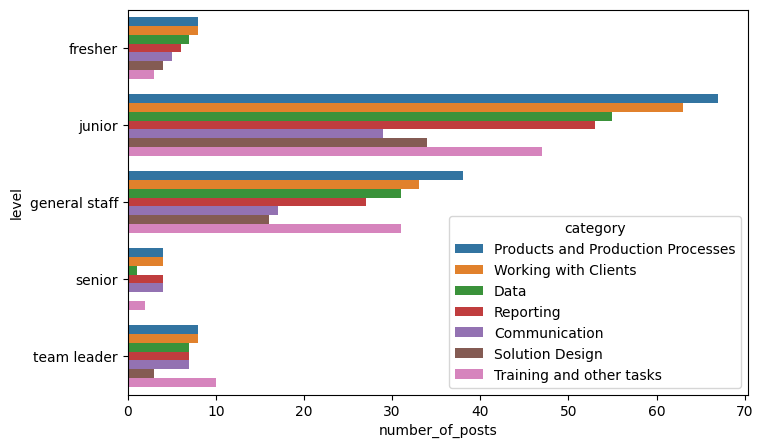

In [1825]:
plt.figure(figsize=(8,5))
ax = sns.barplot(all_list_level,x='number_of_posts',y='level',hue='category')
# for i in ax.containers:
#     ax.bar_label(i, fmt='%.1f')                
# plt.title('Distribution of category per level')
plt.xlabel('number_of_posts', fontsize = 10)
# plt.xlim(0,160)
plt.show()

In [1826]:
level_df.columns

Index(['Unnamed: 0', 'id', 'post_date', 'title', 'title_final', 'sub_group',
       'group', 'salary', 'skill', 'description', 'requirement', 'benefit',
       'location', 'level', 'year_experience', 'employer', 'employer_domain',
       'portal', 'employer_scale', 'country', 'Min_convert', 'Max_convert',
       'salary_convert', 'average', 'new_group', 'Note', 'translated_value',
       'translated_token', 'bow', 'tokens', 'num_tokens', 'token_length',
       'more_200_char', 'more_250_char', 'more_300_char', 'new_col',
       'unique_class', 'tier'],
      dtype='object')

In [1827]:
location_df = level_df.copy()

In [1828]:
location_df.location.value_counts()

ho chi minh                     142
ha noi                          106
da nang                           5
ha noi,ho chi minh                2
vinh phuc                         1
ho chi minh,ha noi                1
remote                            1
ho chi minh,ho chi minh           1
toan quoc                         1
hai phong                         1
dong nai                          1
hai duong,ha noi                  1
nghe an                           1
hai duong                         1
ho chi minh,da nang,ha noi        1
binh dinh,quang ngai,phu yen      1
binh dinh                         1
Name: location, dtype: int64

In [1829]:
location_df.location = location_df.location.str.split(',')

In [1830]:
location_df = location_df.explode('location')

In [1831]:
conditions = [
    (location_df['location'] == 'ho chi minh'),
    (location_df['location'] == 'ha noi'),
    (location_df['location'] == 'da nang'),
    (location_df['location'] == 'ho chi minh,ho chi minh'),
    (location_df['location'] != 'ho chi minh') & (location_df['location'] != 'ha noi') & (location_df['location'] != 'da nang') & (location_df['location'] != 'ho chi minh,ho chi minh')
    ]

# create a list of the values we want to assign for each condition
values = ['ho chi minh', 'ha noi', 'da nang', 'ho chi minh', 'others']

# create a new column and use np.select to assign values to it using our lists as arguments
location_df['new_location'] = np.select(conditions, values)

In [1832]:
hcm = location_df[location_df['new_location'] == 'ho chi minh']
hcm = hcm.loc[hcm['unique_class'].notna()]
hcm = list(itertools.chain(*hcm['unique_class'].tolist()))
hcm = pd.Series(hcm).value_counts().to_frame(name='number_of_posts').reset_index()
hcm = hcm.rename(columns={'index' : 'category'})
hcm['location'] = 'ho chi minh'
hcm

category  number_of_posts     location
0  Products and Production Processes              142  ho chi minh
1                            Clients              139  ho chi minh
2           Training and other tasks              120  ho chi minh
3                          Reporting              112  ho chi minh
4                               Data              109  ho chi minh
5                      Communication               91  ho chi minh
6                    Solution Design               65  ho chi minh

In [1833]:
hn = location_df[location_df['new_location'] == 'ha noi']
hn = hn.loc[hn['unique_class'].notna()]
hn = list(itertools.chain(*hn['unique_class'].tolist()))
hn = pd.Series(hn).value_counts().to_frame(name='number_of_posts').reset_index()
hn = hn.rename(columns={'index' : 'category'})
hn['location'] = 'ha noi'
hn

category  number_of_posts location
0  Products and Production Processes              104   ha noi
1                            Clients               96   ha noi
2                               Data               89   ha noi
3           Training and other tasks               83   ha noi
4                          Reporting               81   ha noi
5                    Solution Design               55   ha noi
6                      Communication               46   ha noi

In [1834]:
dn = location_df[location_df['new_location'] == 'da nang']
dn = dn.loc[dn['unique_class'].notna()]
dn = list(itertools.chain(*dn['unique_class'].tolist()))
dn = pd.Series(dn).value_counts().to_frame(name='number_of_posts').reset_index()
dn = dn.rename(columns={'index' : 'category'})
dn['location'] = 'da nang'
dn

category  number_of_posts location
0  Products and Production Processes                5  da nang
1                            Clients                4  da nang
2                          Reporting                2  da nang
3                               Data                2  da nang
4           Training and other tasks                2  da nang
5                      Communication                1  da nang

In [1835]:
others = location_df[location_df['new_location'] == 'others']
others = others.loc[others['unique_class'].notna()]
others = list(itertools.chain(*others['unique_class'].tolist()))
others = pd.Series(others).value_counts().to_frame(name='number_of_posts').reset_index()
others = others.rename(columns={'index' : 'category'})
others['location'] = 'others'
others

category  number_of_posts location
0                          Reporting               11   others
1                               Data               11   others
2                            Clients               10   others
3  Products and Production Processes               10   others
4           Training and other tasks                7   others
5                    Solution Design                4   others
6                      Communication                3   others

In [1836]:
all_list_location = pd.concat([hn,hcm,dn,others])
all_list_location

category  number_of_posts     location
0  Products and Production Processes              104       ha noi
1                            Clients               96       ha noi
2                               Data               89       ha noi
3           Training and other tasks               83       ha noi
4                          Reporting               81       ha noi
5                    Solution Design               55       ha noi
6                      Communication               46       ha noi
0  Products and Production Processes              142  ho chi minh
1                            Clients              139  ho chi minh
2           Training and other tasks              120  ho chi minh
3                          Reporting              112  ho chi minh
4                               Data              109  ho chi minh
5                      Communication               91  ho chi minh
6                    Solution Design               65  ho chi minh
0  Products and Production Processes                5      da nang
1                            Clients                4      da nang
2                          Reporting                2      da nang
3                               Data                2      da nang
4           Training and other tasks                2      da nang
5                      Communication                1      da nang
0                          Reporting               11       others
1                               Data               11       others
2                            Clients               10       others
3  Products and Production Processes               10       others
4           Training and other tasks                7       others
5                    Solution Design                4       others
6                      Communication                3       others

In [1837]:
all_list_location['category'] = all_list_location['category'].replace(['Clients'], 'Working with Clients')

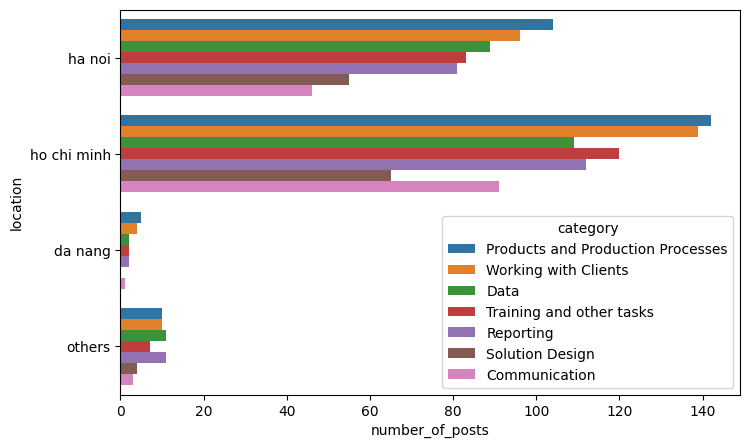

In [1838]:
plt.figure(figsize=(8,5))
ax = sns.barplot(all_list_location,x='number_of_posts',y='location',hue='category')
# for i in ax.containers:
#     ax.bar_label(i, fmt='%.1f')                
# plt.title('Distribution of category per level')
plt.xlabel('number_of_posts', fontsize = 10)
# plt.xlim(0,160)
plt.show()

In [1839]:
# df.to_csv('/Users/hoanglan/Desktop/Lan/Side_Project/20_Dec_combined_df.csv') 

## Small Groups 

### BA Group

In [1840]:
token_df_ba_group['class'] = token_df_ba_group['token'].apply(lambda x: classify_jd(x.lower(), label_ver1))

In [1841]:
count_per = token_df_ba_group.query('token.str.len() > 2')
len(count_per)/len(token_df_ba_group)

0.787919826652221

In [1842]:
token_df_ba_group = token_df_ba_group.loc[token_df_ba_group['class'].notna()]

In [1843]:
for i in token_df_ba_group['class']:
    if (len(i) > 1) & ('P' in i):
        del i['P']

In [1844]:
label_ba_group = token_df_ba_group.loc[token_df_ba_group['class'].notna()]
label_ba_group['jd'] = label_ba_group['class'].apply(lambda x: jd_list(x)[0])
label_ba_group['jd_group'] = label_ba_group['class'].apply(lambda x: jd_list(x)[1])

<Axes: >

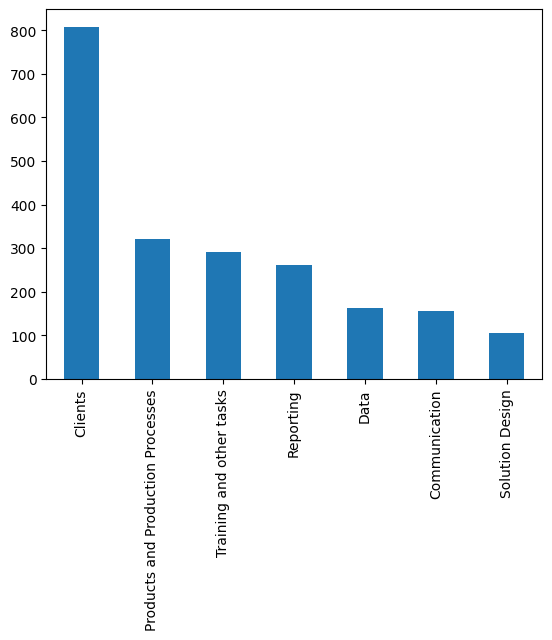

In [1845]:
jd_ba_group = list(itertools.chain(*label_ba_group['jd'].tolist()))
pd.Series(jd_ba_group).value_counts().plot(kind='bar')

In [1846]:
test = label_ba_group.merge(df_test, how='left', on='token')
test.head(10)

token  \
0  Job details Business Analyst and Programmer at...   
1  )02 Business Analyst - Trainee 10 High Technic...   
2  Business Analyst job details at Lifesup Techno...   
3  Learn, collect and analyze customer business r...   
4  Analyze and provide solutions based on collect...   
5  Review documents to agree with customers on pr...   
6  Ensure completion of release plan goals and sp...   
7  Job details of IT Business Analyst (Fulltime-O...   
8  - Analyze business functions and features of t...   
9  - Analyze data flows, use cases, scenarios, wo...   

                                               class  \
0              {'C': ['business'], 'O': ['support']}   
1                                {'C': ['business']}   
2                                {'C': ['business']}   
3  {'C': ['customer', 'business', 'requirements']...   
4  {'C': ['requirements', 'user requirement'], 'D...   
5  {'C': ['customer', 'requirements'], 'R': ['doc...   
6          {'P': ['product', 'product development']}   
7  {'C': ['business', 'requirements'], 'D': ['col...   
8                                {'C': ['business']}   
9  {'D': ['data', 'analyze data', 'model', 'model...   

                                            jd  \
0          [Clients, Training and other tasks]   
1                                    [Clients]   
2                                    [Clients]   
3                              [Clients, Data]   
4  [Clients, Data, Reporting, Solution Design]   
5                         [Clients, Reporting]   
6          [Products and Production Processes]   
7                              [Clients, Data]   
8                                    [Clients]   
9                                       [Data]   

                                      jd_group  \
0          [Clients, Training and other tasks]   
1                                    [Clients]   
2                                    [Clients]   
3                              [Clients, Data]   
4  [Clients, Data, Reporting, Solution Design]   
5                         [Clients, Reporting]   
6          [Products and Production Processes]   
7                              [Clients, Data]   
8                                    [Clients]   
9                                       [Data]   

                                                 des  
0  Job details Business Analyst and Programmer at...  
1  Job details Business Analyst and Programmer at...  
2  Business Analyst job details at Lifesup Techno...  
3  Business Analyst job details at Lifesup Techno...  
4  Business Analyst job details at Lifesup Techno...  
5  Business Analyst job details at Lifesup Techno...  
6  Business Analyst job details at Lifesup Techno...  
7  Job details of IT Business Analyst (Fulltime-O...  
8  Job details of IT Business Analyst (Fulltime-O...  
9  Job details of IT Business Analyst (Fulltime-O...

In [1847]:
df2 = test.groupby('des')['jd'].apply(list).reset_index(name="new_col")

In [1848]:
df2['unique_class'] = ''

In [1849]:
for i in range(len(df2)):
    abc = df2.new_col[i]
    result = list({x for l in abc for x in l})
    df2['unique_class'][i] = result

In [1850]:
df2.head(1)

des  \
0  - Act as the focal point between the Digital B...   

                                             new_col  \
0  [[Clients, Reporting, Communication], [Clients...   

                                        unique_class  
0  [Solution Design, Clients, Training and other ...

In [1851]:
new_df = df2.copy()

In [1852]:
df2 = list(itertools.chain(*df2['unique_class'].tolist()))
pd.Series(df2).value_counts().plot(kind='bar')

<Axes: >

In [1853]:
all_group_list = pd.Series(df2).value_counts().to_frame(name='number_of_posts').reset_index()

In [1854]:
all_group_list = all_group_list.rename(columns={'index' : 'type'})

In [1855]:
all_group_list = pd.Series(df2).value_counts().to_frame(name='number_of_posts').reset_index()
all_group_list = all_group_list.rename(columns={'index' : 'type'})
all_group_list['group'] = 'BA'
all_group_list

type  number_of_posts group
0                            Clients              145    BA
1           Training and other tasks              113    BA
2                          Reporting              113    BA
3  Products and Production Processes              111    BA
4                               Data               96    BA
5                      Communication               90    BA
6                    Solution Design               59    BA

In [1856]:
# token_df_ba_group.to_csv('/Users/hoanglan/Desktop/Lan/Side_Project/BA.csv') 

### DA and BI Group

In [1857]:
token_df_da_bi_group['class'] = token_df_da_bi_group['token'].apply(lambda x: classify_jd(x.lower(), label_ver1))
token_df_da_bi_group.loc[token_df_da_bi_group['class'].notna()]

token  \
0     Creating the dashboards/reports for Operations...   
1     Evaluate and define business metrics to improv...   
2                   Consult business stakeholders (e.g.   
3     Business Development, Operation Excellence, et...   
4     Creating and enforcing policies for effective ...   
...                                                 ...   
1474   Attractive training regime according to title...   
1475  *Location job at Quy Nhon, Binh Dinh * We are ...   
1480   Work with the executive teams to develop and ...   
1482   Manage project initiatives, ensuring the effe...   
1484   Hire, manage, and mentor technology teams, pr...   

                                                  class  
0       {'C': ['business'], 'R': ['report', 'reports']}  
1                 {'C': ['business'], 'P': ['project']}  
2                    {'C': ['business', 'stakeholder']}  
3     {'C': ['business'], 'D': ['data'], 'O': ['task...  
4                                       {'D': ['data']}  
...                                                 ...  
1474                                {'O': ['training']}  
1475                  {'D': ['data'], 'P': ['project']}  
1480                               {'B': ['work with']}  
1482  {'P': ['project'], 'S': ['solution', 'solution...  
1484                                 {'O': ['support']}  

[619 rows x 2 columns]

In [1858]:
count_per = token_df_da_bi_group.query('token.str.len() > 2')
len(count_per)/len(token_df_da_bi_group)

0.8141414141414142

In [1859]:
label_da_bi_group = token_df_da_bi_group.loc[token_df_da_bi_group['class'].notna()]
label_da_bi_group['jd'] = label_da_bi_group['class'].apply(lambda x: jd_list(x)[0])
label_da_bi_group['jd_group'] = label_da_bi_group['class'].apply(lambda x: jd_list(x)[1])

<Axes: >

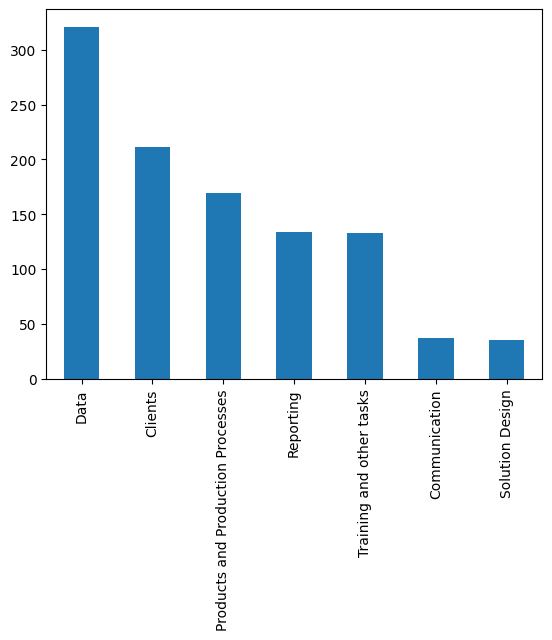

In [1860]:
jd_da_bi_group = list(itertools.chain(*label_da_bi_group['jd'].tolist()))
pd.Series(jd_da_bi_group).value_counts().plot(kind='bar')

In [1861]:
test = label_da_bi_group.merge(df_test, how='left', on='token')
test.head(10)

token  \
0  Creating the dashboards/reports for Operations...   
1  Evaluate and define business metrics to improv...   
2                Consult business stakeholders (e.g.   
3  Business Development, Operation Excellence, et...   
4  Creating and enforcing policies for effective ...   
5  Formulating management techniques for quality ...   
6  Devising and implementing efficient and secure...   
7  - Creating the dashboards/reports for Operatio...   
8  Evaluate and define business metrics to improv...   
9  Business Development, Operation Excellence, et...   

                                               class  \
0    {'C': ['business'], 'R': ['report', 'reports']}   
1              {'C': ['business'], 'P': ['project']}   
2                 {'C': ['business', 'stakeholder']}   
3  {'C': ['business'], 'D': ['data'], 'O': ['task...   
4                                    {'D': ['data']}   
5                         {'D': ['data', 'collect']}   
6                                    {'D': ['data']}   
7    {'C': ['business'], 'R': ['report', 'reports']}   
8  {'C': ['business', 'stakeholder'], 'P': ['proj...   
9  {'C': ['business'], 'D': ['data'], 'O': ['task...   

                                             jd  \
0                          [Clients, Reporting]   
1  [Clients, Products and Production Processes]   
2                                     [Clients]   
3     [Clients, Data, Training and other tasks]   
4                                        [Data]   
5                                        [Data]   
6                                        [Data]   
7                          [Clients, Reporting]   
8  [Clients, Products and Production Processes]   
9     [Clients, Data, Training and other tasks]   

                                       jd_group  \
0                          [Clients, Reporting]   
1  [Clients, Products and Production Processes]   
2                                     [Clients]   
3     [Clients, Data, Training and other tasks]   
4                                        [Data]   
5                                        [Data]   
6                                        [Data]   
7                          [Clients, Reporting]   
8  [Clients, Products and Production Processes]   
9     [Clients, Data, Training and other tasks]   

                                                 des  
0  Creating the dashboards/reports for Operations...  
1  Creating the dashboards/reports for Operations...  
2  Creating the dashboards/reports for Operations...  
3  Creating the dashboards/reports for Operations...  
4  Creating and enforcing policies for effective ...  
5  Creating and enforcing policies for effective ...  
6  Creating and enforcing policies for effective ...  
7  - Creating the dashboards/reports for Operatio...  
8  - Creating the dashboards/reports for Operatio...  
9  - Creating the dashboards/reports for Operatio...

In [1862]:
df2 = test.groupby('des')['jd'].apply(list).reset_index(name="new_col")

In [1863]:
df2['unique_class'] = ''

In [1864]:
for i in range(len(df2)):
    abc = df2.new_col[i]
    result = list({x for l in abc for x in l})
    df2['unique_class'][i] = result

In [1865]:
df2.head(1)

des  \
0  "Mcredit - When You Need It! Mcredit - Nice to...   

                                             new_col  \
0  [[Clients], [Training and other tasks], [Data,...   

                                        unique_class  
0  [Products and Production Processes, Solution D...

In [1866]:
new_df = pd.concat([new_df, df2])

In [1867]:
df2 = list(itertools.chain(*df2['unique_class'].tolist()))
pd.Series(df2).value_counts().plot(kind='bar')

<Axes: >

In [1868]:
all_group_list_2 = pd.Series(df2).value_counts().to_frame(name='number_of_posts').reset_index()
all_group_list_2 = all_group_list_2.rename(columns={'index' : 'type'})
all_group_list_2['group'] = 'DA/BI'
all_group_list = pd.concat([all_group_list, all_group_list_2])
all_group_list

type  number_of_posts  group
0                            Clients              145     BA
1           Training and other tasks              113     BA
2                          Reporting              113     BA
3  Products and Production Processes              111     BA
4                               Data               96     BA
5                      Communication               90     BA
6                    Solution Design               59     BA
0                            Clients               80  DA/BI
1                               Data               65  DA/BI
2  Products and Production Processes               63  DA/BI
3           Training and other tasks               48  DA/BI
4                          Reporting               48  DA/BI
5                      Communication               28  DA/BI
6                    Solution Design               23  DA/BI

### DE Group

In [1869]:
token_df_de_group['class'] = token_df_de_group['token'].apply(lambda x: classify_jd(x.lower(), label_ver1))
token_df_de_group.loc[token_df_de_group['class'].notna()]

token  \
0     Structure, setup, maintenance, and monitoring ...   
2     • Participate in developing big data managemen...   
3     • Participate in optimal performance for data ...   
4     • Handle medium to difficult requirements in t...   
5     • Provide solutions ideas for improving perfor...   
...                                                 ...   
1038   Design detailed solutions for streams Collect...   
1040                            Coordinate and support    
1041                                              Data    
1042  Scientist in converting models, machine learni...   
1043   Design solutions and directly develop modules...   

                                                  class  
0                                     {'P': ['system']}  
2                                       {'D': ['data']}  
3                                       {'D': ['data']}  
4             {'C': ['requirements'], 'P': ['project']}  
5     {'P': ['system'], 'S': ['solution', 'solutions']}  
...                                                 ...  
1038  {'D': ['data', 'collect'], 'S': ['solution', '...  
1040                                 {'O': ['support']}  
1041                                    {'D': ['data']}  
1042  {'D': ['data', 'model', 'models'], 'P': ['soft...  
1043                   {'S': ['solution', 'solutions']}  

[401 rows x 2 columns]

In [1870]:
count_per = token_df_de_group.query('token.str.len() > 2')
len(count_per)/len(token_df_de_group)

0.754066985645933

In [1871]:
label_de_group = token_df_de_group.loc[token_df_de_group['class'].notna()]
label_de_group['jd'] = label_de_group['class'].apply(lambda x: jd_list(x)[0])
label_de_group['jd_group'] = label_de_group['class'].apply(lambda x: jd_list(x)[1])

<Axes: >

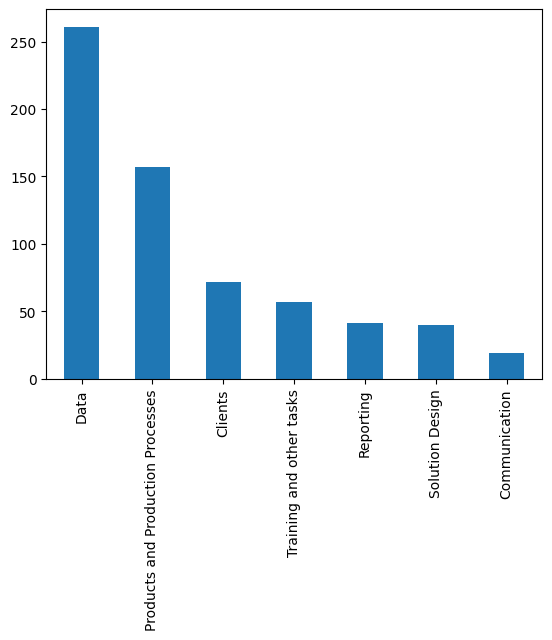

In [1872]:
jd_de_group = list(itertools.chain(*label_de_group['jd'].tolist()))
pd.Series(jd_de_group).value_counts().plot(kind='bar')

In [1873]:
test = label_de_group.merge(df_test, how='left', on='token')
test.head(10)

token  \
0  Structure, setup, maintenance, and monitoring ...   
1  • Participate in developing big data managemen...   
2  • Participate in developing big data managemen...   
3  • Participate in optimal performance for data ...   
4  • Participate in optimal performance for data ...   
5  • Handle medium to difficult requirements in t...   
6  • Handle medium to difficult requirements in t...   
7  • Provide solutions ideas for improving perfor...   
8  • Provide solutions ideas for improving perfor...   
9  Build and maintain DWH solution using Google P...   

                                               class  \
0                                  {'P': ['system']}   
1                                    {'D': ['data']}   
2                                    {'D': ['data']}   
3                                    {'D': ['data']}   
4                                    {'D': ['data']}   
5          {'C': ['requirements'], 'P': ['project']}   
6          {'C': ['requirements'], 'P': ['project']}   
7  {'P': ['system'], 'S': ['solution', 'solutions']}   
8  {'P': ['system'], 'S': ['solution', 'solutions']}   
9                                {'S': ['solution']}   

                                                  jd  \
0                [Products and Production Processes]   
1                                             [Data]   
2                                             [Data]   
3                                             [Data]   
4                                             [Data]   
5       [Clients, Products and Production Processes]   
6       [Clients, Products and Production Processes]   
7  [Products and Production Processes, Solution D...   
8  [Products and Production Processes, Solution D...   
9                                  [Solution Design]   

                                            jd_group  \
0                [Products and Production Processes]   
1                                             [Data]   
2                                             [Data]   
3                                             [Data]   
4                                             [Data]   
5       [Clients, Products and Production Processes]   
6       [Clients, Products and Production Processes]   
7  [Products and Production Processes, Solution D...   
8  [Products and Production Processes, Solution D...   
9                                  [Solution Design]   

                                                 des  
0  Structure, setup, maintenance, and monitoring ...  
1  • Participate in developing big data managemen...  
2  • Participate in developing big data managemen...  
3  • Participate in developing big data managemen...  
4  • Participate in developing big data managemen...  
5  • Participate in developing big data managemen...  
6  • Participate in developing big data managemen...  
7  • Participate in developing big data managemen...  
8  • Participate in developing big data managemen...  
9  Build and maintain DWH solution using Google P...

In [1874]:
df2 = test.groupby('des')['jd'].apply(list).reset_index(name="new_col")

In [1875]:
df2['unique_class'] = ''

In [1876]:
for i in range(len(df2)):
    abc = df2.new_col[i]
    result = list({x for l in abc for x in l})
    df2['unique_class'][i] = result

In [1877]:
df2.head(1)

des  \
0  - Build and develop big data storage and proce...   

                                             new_col  \
0  [[Data, Products and Production Processes], [D...   

                                        unique_class  
0  [Solution Design, Data, Products and Productio...

In [1878]:
new_df = pd.concat([new_df, df2])

<Axes: >

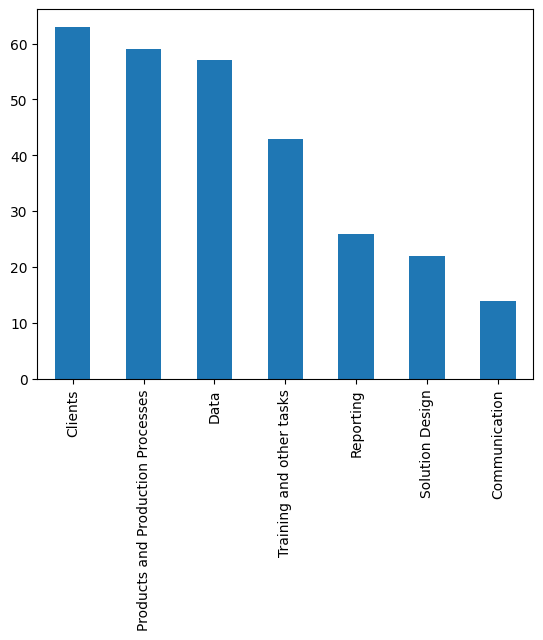

In [1879]:
df2 = list(itertools.chain(*df2['unique_class'].tolist()))
pd.Series(df2).value_counts().plot(kind='bar')

In [1880]:
all_group_list_2 = pd.Series(df2).value_counts().to_frame(name='number_of_posts').reset_index()
all_group_list_2 = all_group_list_2.rename(columns={'index' : 'type'})
all_group_list_2['group'] = 'DE'
all_group_list = pd.concat([all_group_list, all_group_list_2])
all_group_list

type  number_of_posts  group
0                            Clients              145     BA
1           Training and other tasks              113     BA
2                          Reporting              113     BA
3  Products and Production Processes              111     BA
4                               Data               96     BA
5                      Communication               90     BA
6                    Solution Design               59     BA
0                            Clients               80  DA/BI
1                               Data               65  DA/BI
2  Products and Production Processes               63  DA/BI
3           Training and other tasks               48  DA/BI
4                          Reporting               48  DA/BI
5                      Communication               28  DA/BI
6                    Solution Design               23  DA/BI
0                            Clients               63     DE
1  Products and Production Processes               59     DE
2                               Data               57     DE
3           Training and other tasks               43     DE
4                          Reporting               26     DE
5                    Solution Design               22     DE
6                      Communication               14     DE

### DS ML AI Group

In [1881]:
token_df_ds_ml_ai_group['class'] = token_df_ds_ml_ai_group['token'].apply(lambda x: classify_jd(x.lower(), label_ver1))
token_df_ds_ml_ai_group.loc[token_df_ds_ml_ai_group['class'].notna()]

token  \
0    Responsible for building the ML/AI models to a...   
2    Work on NLP (Natural Language Processing) capa...   
3    Monitor and develop evaluation strategies for ...   
4    Identify and validate business use cases that ...   
5    - Support specialized lecturers in searching, ...   
..                                                 ...   
324   Build, validate and deploy machine learning a...   
326            sell, Customer Churn Prediction, etc.).   
328   Collaborate with engineering and product deve...   
330   Provide technical sharing/training to team me...   
336   Unique culture with many exciting activities:...   

                                                 class  
0         {'D': ['model', 'models'], 'P': ['product']}  
2    {'D': ['model', 'models'], 'P': ['product'], '...  
3                                     {'D': ['model']}  
4                   {'C': ['business'], 'P': ['test']}  
5                                   {'O': ['support']}  
..                                                 ...  
324  {'C': ['customer', 'business'], 'D': ['model',...  
326                                {'C': ['customer']}  
328          {'P': ['product', 'product development']}  
330                                {'O': ['training']}  
336                                {'O': ['training']}  

[150 rows x 2 columns]

In [1882]:
count_per = token_df_ds_ml_ai_group.query('token.str.len() > 2')
len(count_per)/len(token_df_ds_ml_ai_group)

0.8558823529411764

In [1883]:
token_df_ds_ml_ai_group = token_df_ds_ml_ai_group.loc[token_df_ds_ml_ai_group['class'].notna()]
token_df_ds_ml_ai_group

token  \
0    Responsible for building the ML/AI models to a...   
2    Work on NLP (Natural Language Processing) capa...   
3    Monitor and develop evaluation strategies for ...   
4    Identify and validate business use cases that ...   
5    - Support specialized lecturers in searching, ...   
..                                                 ...   
324   Build, validate and deploy machine learning a...   
326            sell, Customer Churn Prediction, etc.).   
328   Collaborate with engineering and product deve...   
330   Provide technical sharing/training to team me...   
336   Unique culture with many exciting activities:...   

                                                 class  
0         {'D': ['model', 'models'], 'P': ['product']}  
2    {'D': ['model', 'models'], 'P': ['product'], '...  
3                                     {'D': ['model']}  
4                   {'C': ['business'], 'P': ['test']}  
5                                   {'O': ['support']}  
..                                                 ...  
324  {'C': ['customer', 'business'], 'D': ['model',...  
326                                {'C': ['customer']}  
328          {'P': ['product', 'product development']}  
330                                {'O': ['training']}  
336                                {'O': ['training']}  

[150 rows x 2 columns]

In [1884]:
def jd_list(class_):
    global class_dict

    jd_code = list(class_.keys())
    jd = class_dict.loc[class_dict['code'].isin(jd_code)]['jd'].tolist()
    jd_group = class_dict.loc[class_dict['code'].isin(jd_code)]['jd_group'].tolist()
    
    return jd, jd_group

token_df_ds_ml_ai_group['jd'] = token_df_ds_ml_ai_group['class'].apply(lambda x: jd_list(x)[0])
token_df_ds_ml_ai_group['jd_group'] = token_df_ds_ml_ai_group['class'].apply(lambda x: jd_list(x)[1])

In [1885]:
BoB = list(itertools.chain(*token_df_ds_ml_ai_group['jd'].tolist()))
pd.Series(BoB).value_counts().plot(kind='bar')

<Axes: >

In [1886]:
test = token_df_ds_ml_ai_group.merge(df_test, how='left', on='token')
test.head(10)

token  \
0  Responsible for building the ML/AI models to a...   
1  Work on NLP (Natural Language Processing) capa...   
2  Monitor and develop evaluation strategies for ...   
3  Identify and validate business use cases that ...   
4  - Support specialized lecturers in searching, ...   
5  - Help determine requirements for software, to...   
6  - Support instructors in using images, charts,...   
7  - Check and help correct errors in learning ma...   
8  - Support uploading learning material content ...   
9  Collect and annotate data to support research ...   

                                               class  \
0       {'D': ['model', 'models'], 'P': ['product']}   
1  {'D': ['model', 'models'], 'P': ['product'], '...   
2                                   {'D': ['model']}   
3                 {'C': ['business'], 'P': ['test']}   
4                                 {'O': ['support']}   
5         {'C': ['requirements'], 'P': ['software']}   
6                                 {'O': ['support']}   
7                                   {'P': ['check']}   
8                {'P': ['system'], 'O': ['support']}   
9       {'D': ['data', 'collect'], 'O': ['support']}   

                                                  jd  \
0          [Data, Products and Production Processes]   
1  [Data, Products and Production Processes, Comm...   
2                                             [Data]   
3       [Clients, Products and Production Processes]   
4                         [Training and other tasks]   
5       [Clients, Products and Production Processes]   
6                         [Training and other tasks]   
7                [Products and Production Processes]   
8  [Products and Production Processes, Training a...   
9                   [Data, Training and other tasks]   

                                            jd_group  \
0          [Data, Products and Production Processes]   
1  [Data, Products and Production Processes, Comm...   
2                                             [Data]   
3       [Clients, Products and Production Processes]   
4                         [Training and other tasks]   
5       [Clients, Products and Production Processes]   
6                         [Training and other tasks]   
7                [Products and Production Processes]   
8  [Products and Production Processes, Training a...   
9                   [Data, Training and other tasks]   

                                                 des  
0  Responsible for building the ML/AI models to a...  
1  Responsible for building the ML/AI models to a...  
2  Responsible for building the ML/AI models to a...  
3  Responsible for building the ML/AI models to a...  
4  - Support specialized lecturers in searching, ...  
5  - Support specialized lecturers in searching, ...  
6  - Support specialized lecturers in searching, ...  
7  - Support specialized lecturers in searching, ...  
8  - Support specialized lecturers in searching, ...  
9  Collect and annotate data to support research ...

In [1887]:
df2 = test.groupby('des')['jd'].apply(list).reset_index(name="new_col")

In [1888]:
df2['unique_class'] = ''

In [1889]:
for i in range(len(df2)):
    abc = df2.new_col[i]
    result = list({x for l in abc for x in l})
    df2['unique_class'][i] = result

In [1890]:
df2

des  \
0   - Participate in research, design and developm...   
1   - Position duties: + Research and build predic...   
2   - Support specialized lecturers in searching, ...   
3   ABOUT EARABLEEarable Neuroscience US is a deep...   
4   Analyze EEG/EMG/EOG brain signals to predict u...   
5   As a Data Scientist, you will implement machin...   
6   As a Software Data Engineer, you will be respo...   
7   BUSINESS AND MARKETING ANALYST job details at ...   
8   Chi tiết công việc Big Data Engineer tại Fetch...   
9   Chi tiết công việc Data Analyst  tại OKXEĐịa đ...   
10  Chi tiết công việc Data Analyst (Tableau) tại ...   
11  Chi tiết công việc Data Analyst / Data Researc...   
12  Chi tiết công việc Data Analyst tại AdeccoGrab...   
13  Chi tiết công việc Data Analyst tại Kiến GuruW...   
14  Chi tiết công việc Data Engineer Up To 2000 US...   
15  Chi tiết công việc Fresher Data Engineer tại O...   
16  Chi tiết công việc IT Specialist and Data Anal...   
17  Chi tiết công việc Junior Data Scientist  tại ...   
18  Collaborate with development teams to build an...   
19  Collect and annotate data to support research ...   
20  DATX Vietnam (DAT Technologies) is leading in ...   
21  Daily Routine Workflow:Customer care process a...   
22  Job description - Build and develop big data s...   
23  Job details Product RD (Edtech - Game - AI - M...   
24  Job details TOTAL REWARDS SPECIALIST / HR Data...   
25  Job details [HCM] Data Engineer at Financial S...   
26  LPTechnology OverviewWe are looking for a Data...   
27  Mô tả Công việc ABOUT EARABLEEarable® Neurosci...   
28  Mô tả Công việc Work with corporate/SME client...   
29  Mô tả Công việc · Data Analyst will act as a l...   
30  Participate in Asilla product building project...   
31  Position DescriptionAs a Lead AI Engineer, we ...   
32  Research and develop solutions in the field of...   
33  Responsible for building the ML/AI models to a...   
34  Responsible for setting up and operating the i...   
35  We are seeking a highly motivated and talented...   
36  • Participate in developing big data managemen...   

                                              new_col  \
0   [[Data, Products and Production Processes], [C...   
1   [[Data], [Data], [Clients, Data], [Solution De...   
2   [[Training and other tasks], [Clients, Product...   
3   [[Solution Design], [Products and Production P...   
4   [[Training and other tasks], [Data], [Products...   
5   [[Clients, Data], [Data, Products and Producti...   
6   [[Data], [Data], [Data], [Data], [Data], [Data...   
7                            [[Data], [Data], [Data]]   
8   [[Data], [Data], [Data], [Data], [Data], [Data...   
9   [[Data], [Data], [Data], [Data], [Data], [Data...   
10                           [[Data], [Data], [Data]]   
11   [[Data], [Data], [Data], [Data], [Data], [Data]]   
12                           [[Data], [Data], [Data]]   
13                           [[Data], [Data], [Data]]   
14                           [[Data], [Data], [Data]]   
15   [[Data], [Data], [Data], [Data], [Data], [Data]]   
16                           [[Data], [Data], [Data]]   
17  [[Data], [Data], [Data], [Data], [Data], [Clie...   
18  [[Products and Production Processes], [Clients...   
19  [[Data, Training and other tasks], [Data], [Cl...   
20  [[Training and other tasks], [Training and oth...   
21                           [[Data], [Data], [Data]]   
22                           [[Data], [Data], [Data]]   
23  [[Products and Production Processes], [Clients...   
24                           [[Data], [Data], [Data]]   
25                           [[Data], [Data], [Data]]   
26  [[Clients, Data, Products and Production Proce...   
27                                [[Solution Design]]   
28   [[Data], [Data], [Data], [Data], [Data], [Data]]   
29                           [[Data], [Data], [Data]]   
30  [[Products and Production Processes], [Product...   
31  [[Clients, Data], [Clients, Solution Design], ...   
32

<Axes: >

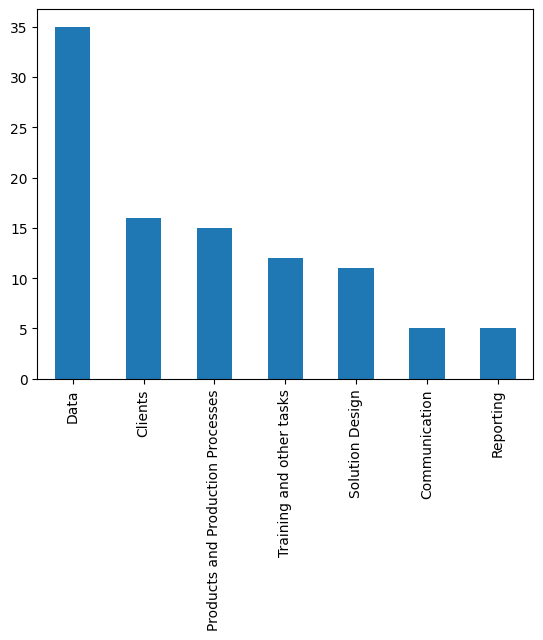

In [1891]:
df2 = list(itertools.chain(*df2['unique_class'].tolist()))
pd.Series(df2).value_counts().plot(kind='bar')

In [1892]:
len(new_df)

359

In [1893]:
new_df

des  \
0   - Act as the focal point between the Digital B...   
1   - Collect information, analyze requirements an...   
2   - Communicate with clients and other stakehold...   
3   - Drive the standardization and daily automati...   
4   - Participate in projects with foreign custome...   
..                                                ...   
92  • Develop and manage a sustainable, profitable...   
93  • Manage MySQL Server databases. • Perform and...   
94  • Participate in developing big data managemen...   
95  • Work closely with other engineers to develop...   
96  •To understand Supply chain Management systems...   

                                              new_col  \
0   [[Clients, Reporting, Communication], [Clients...   
1   [[Clients, Data, Solution Design], [Clients, D...   
2   [[Clients, Communication, Training and other t...   
3   [[Clients, Reporting, Training and other tasks...   
4   [[Clients], [Clients], [Clients, Reporting], [...   
..                                                ...   
92  [[Products and Production Processes], [Product...   
93                           [[Data], [Data], [Data]]   
94  [[Data], [Data], [Data], [Data], [Clients, Pro...   
95  [[Products and Production Processes, Training ...   
96  [[Products and Production Processes], [Product...   

                                         unique_class  
0   [Solution Design, Clients, Training and other ...  
1   [Products and Production Processes, Solution D...  
2   [Products and Production Processes, Solution D...  
3   [Clients, Reporting, Data, Training and other ...  
4                                [Clients, Reporting]  
..                                                ...  
92                [Products and Production Processes]  
93                                             [Data]  
94  [Clients, Data, Solution Design, Products and ...  
95  [Training and other tasks, Reporting, Products...  
96                [Products and Production Processes]  

[359 rows x 3 columns]

<Axes: >

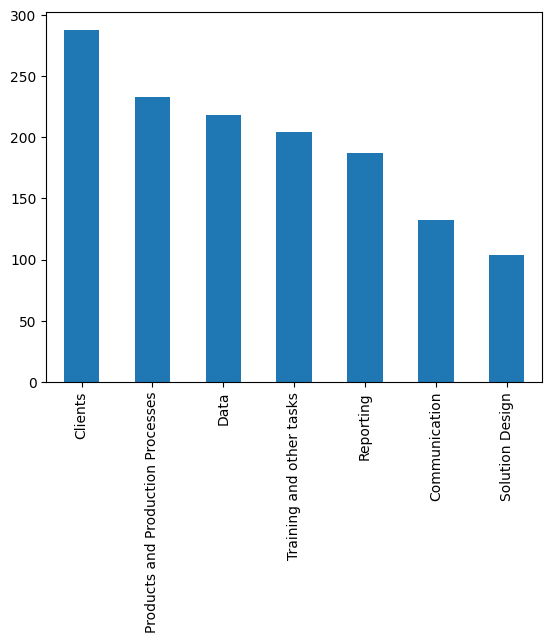

In [1894]:
df2 = list(itertools.chain(*new_df['unique_class'].tolist()))
pd.Series(df2).value_counts().plot(kind='bar')

In [1895]:
all_group_list_2 = pd.Series(df2).value_counts().to_frame(name='number_of_posts').reset_index()
all_group_list_2 = all_group_list_2.rename(columns={'index' : 'type'})
all_group_list_2['group'] = 'DS/ML/AI'
all_group_list = pd.concat([all_group_list, all_group_list_2])
all_group_list

type  number_of_posts     group
0                            Clients              145        BA
1           Training and other tasks              113        BA
2                          Reporting              113        BA
3  Products and Production Processes              111        BA
4                               Data               96        BA
5                      Communication               90        BA
6                    Solution Design               59        BA
0                            Clients               80     DA/BI
1                               Data               65     DA/BI
2  Products and Production Processes               63     DA/BI
3           Training and other tasks               48     DA/BI
4                          Reporting               48     DA/BI
5                      Communication               28     DA/BI
6                    Solution Design               23     DA/BI
0                            Clients               63        DE
1  Products and Production Processes               59        DE
2                               Data               57        DE
3           Training and other tasks               43        DE
4                          Reporting               26        DE
5                    Solution Design               22        DE
6                      Communication               14        DE
0                            Clients              288  DS/ML/AI
1  Products and Production Processes              233  DS/ML/AI
2                               Data              218  DS/ML/AI
3           Training and other tasks              204  DS/ML/AI
4                          Reporting              187  DS/ML/AI
5                      Communication              132  DS/ML/AI
6                    Solution Design              104  DS/ML/AI

In [1896]:
#df with tokens 
df = pd.read_csv("/Users/hoanglan/Desktop/Lan/Side_Project/data_1971_resubgroup_trans.csv", index_col=0).reset_index(drop=True)

In [1897]:
df.head()

id   post_date                                              title  \
0  ITV3533  2023-03-02                         Backend Developer (Golang)   
1  ITV2405  2023-03-01            Back-End Developer (NodeJS/Java/Golang)   
2  ITV4923  2023-03-01        Senior Android Developer (OOP)- Up to 2000$   
3  ITV3405  2023-02-28  Front-end Developer (Angular/AngularJS/JavaScr...   
4  ITV0343  2023-02-28                Backend Developer (Java/Spring/MVC)   

          title_final sub_group                 group             salary  \
0   backend developer   backend  Software Development  1,000 - 2,500 USD   
1   backend developer   backend  Software Development    800 - 1,500 USD   
2   android developer    mobile  Software Development  1,000 - 2,000 USD   
3  frontend developer  frontend  Software Development    500 - 1,000 USD   
4   backend developer   backend  Software Development    500 - 3,000 USD   

    salary_convert  salary_average  salary_std  ... year_experience  \
0  1000.0 - 2500.0          1750.0       750.0  ...         unknown   
1   800.0 - 1500.0          1150.0       350.0  ...         unknown   
2  1000.0 - 2000.0          1500.0       500.0  ...         unknown   
3   500.0 - 1000.0           750.0       250.0  ...         unknown   
4   500.0 - 3000.0          1750.0      1250.0  ...         unknown   

                                employer employer_domain employee_average  \
0                        One Mount Group              in           1000.0   
1                      Thu Do Multimedia              in            100.5   
2                           META Vision               in             25.5   
3                    THE INNOVATION GUYS              in             25.5   
4  Ngân hàng TMCP Sài Gòn - Hà Nội (SHB)              in           1000.0   

  employer_scale_new_group                                                url  \
0                 300-4999  https://itviec.com/it-jobs/backend-developer-g...   
1                  100-299  https://itviec.com/it-jobs/back-end-developer-...   
2                    10-99  https://itviec.com/it-jobs/senior-android-deve...   
3                    10-99  https://itviec.com/it-jobs/front-end-developer...   
4                 300-4999  https://itviec.com/it-jobs/backend-developer-j...   

   portal                                            skill_1 jd_lang  \
0  ITViec                                 ['java', 'golang']      en   
1  ITViec  ['fresher accepted', 'golang', 'javascript', '...      en   
2  ITViec                      ['english', 'oop', 'android']      vi   
3  ITViec             ['angularjs', 'javascript', 'angular']      en   
4  ITViec                          ['mvc', 'spring', 'java']      vi   

                                    translated_value  
0  We are looking for experienced Back-end Engine...  
1  · Develop scalable microservices-based system ...  
2  MetaVision is looking for teammates to partici...  
3  As Angular Developer, you are expected to have...  
4  - Be the person professionally responsible for...  

[5 rows x 29 columns]

In [1898]:
df.columns

Index(['id', 'post_date', 'title', 'title_final', 'sub_group', 'group',
       'salary', 'salary_convert', 'salary_average', 'salary_std', 'precision',
       'salary_new_group', 'skill', 'skill_group', 'description',
       'requirement', 'benefit', 'location', 'level', 'year_experience',
       'employer', 'employer_domain', 'employee_average',
       'employer_scale_new_group', 'url', 'portal', 'skill_1', 'jd_lang',
       'translated_value'],
      dtype='object')

In [1899]:
len(df)

1912

In [1900]:
final_df = df[['translated_value','title', 'title_final', 'sub_group', 'group', 'level']].drop_duplicates()
final_df.reset_index(drop=True)

translated_value  \
0     We are looking for experienced Back-end Engine...   
1     · Develop scalable microservices-based system ...   
2     MetaVision is looking for teammates to partici...   
3     As Angular Developer, you are expected to have...   
4     - Be the person professionally responsible for...   
...                                                 ...   
1867  Partner of Navigos Search - Securities company...   
1868  Description: We are looking for a Business Ana...   
1869  Come to us at Apec, a place for you to affirm ...   
1870  - Export and process daily sales data from DMS...   
1871  1. Reporting (20%) · Exploit data, build, upda...   

                                                  title         title_final  \
0                            Backend Developer (Golang)   backend developer   
1               Back-End Developer (NodeJS/Java/Golang)   backend developer   
2           Senior Android Developer (OOP)- Up to 2000$   android developer   
3     Front-end Developer (Angular/AngularJS/JavaScr...  frontend developer   
4                   Backend Developer (Java/Spring/MVC)   backend developer   
...                                                 ...                 ...   
1867               [Hà Nội] Business Analyst (Upto 40M)    business analyst   
1868                           Business Analyst ($2500)    business analyst   
1869  Business Analyst - Chuyên Viên Phân Tích Nghiệ...    business analyst   
1870        Chuyên Viên Phân Tích Dữ Liệu/ Data Analyst        data analyst   
1871  Chuyên Viên Phân Tích Dữ Liệu (Senior Data/bi ...        data analyst   

     sub_group                 group          level  
0      backend  Software Development        unknown  
1      backend  Software Development        unknown  
2       mobile  Software Development        unknown  
3     frontend  Software Development        unknown  
4      backend  Software Development        unknown  
...        ...                   ...            ...  
1867        BA        Data Analytics  general staff  
1868        BA        Data Analytics  general staff  
1869        BA        Data Analytics  general staff  
1870     DA/BI        Data Analytics  general staff  
1871     DA/BI        Data Analytics  general staff  

[1872 rows x 6 columns]

In [1901]:
final_df = final_df.rename(columns = {'translated_value':'description'})

In [1902]:
final_df.sub_group.value_counts()

backend      543
fullstack    232
frontend     195
mobile       190
BA           138
DA/BI         57
DE            49
DS/ML/AI      18
Name: sub_group, dtype: int64

# DRAFT

In [1903]:
# jd is Null
len(df.loc[df['description'].isna()])/len(df)

0.0

In [1904]:
# create bag of words 
def createBoW(text):
    text = text.lower()
    for p in string.punctuation:
        text = text.replace(p, "")

    text = text.split(" ")
    new_text = [word for word in text if word not in stopwords.words('english')]
    return new_text

### All data

In [1905]:
# apply text-processing for the whole datset
final_df['description'] = final_df['description'].astype(str)
final_df['bow'] = final_df['description'].apply(lambda x: createBoW(x))
final_df.head(5)

description  \
0  We are looking for experienced Back-end Engine...   
1  · Develop scalable microservices-based system ...   
2  MetaVision is looking for teammates to partici...   
3  As Angular Developer, you are expected to have...   
4  - Be the person professionally responsible for...   

                                               title         title_final  \
0                         Backend Developer (Golang)   backend developer   
1            Back-End Developer (NodeJS/Java/Golang)   backend developer   
2        Senior Android Developer (OOP)- Up to 2000$   android developer   
3  Front-end Developer (Angular/AngularJS/JavaScr...  frontend developer   
4                Backend Developer (Java/Spring/MVC)   backend developer   

  sub_group                 group    level  \
0   backend  Software Development  unknown   
1   backend  Software Development  unknown   
2    mobile  Software Development  unknown   
3  frontend  Software Development  unknown   
4   backend  Software Development  unknown   

                                                 bow  
0  [looking, experienced, backend, engineers, gol...  
1  [·, develop, scalable, microservicesbased, sys...  
2  [metavision, looking, teammates, participate, ...  
3  [angular, developer, expected, strong, backgro...  
4  [, person, professionally, responsible, design...

In [1906]:
pd.Series(list(itertools.chain(*list(final_df['bow'].values)))).value_counts().keys().tolist()

['',
 'team',
 'design',
 'development',
 'work',
 'participate',
 'develop',
 'data',
 'requirements',
 'software',
 'business',
 'product',
 'new',
 'system',
 'project',
 'projects',
 'code',
 '•',
 'applications',
 'products',
 'build',
 'solutions',
 'support',
 'application',
 'research',
 'technical',
 'company',
 'systems',
 'quality',
 'management',
 'technology',
 'developing',
 'features',
 'using',
 'customers',
 'analyze',
 'process',
 'web',
 'working',
 'improve',
 'members',
 'analysis',
 'technologies',
 'experience',
 'ensure',
 'according',
 'user',
 'tasks',
 'building',
 'performance',
 'testing',
 'maintain',
 'implement',
 'documents',
 'optimize',
 'customer',
 'programming',
 'test',
 'platform',
 'mobile',
 'backend',
 'coordinate',
 'assigned',
 'job',
 'companys',
 'perform',
 'based',
 'create',
 'collaborate',
 'review',
 'skills',
 'write',
 'use',
 'problems',
 'services',
 'frontend',
 'provide',
 'teams',
 'game',
 'apply',
 'knowledge',
 'related',
 '

In [1907]:
# tokenize
final_df['tokens'] = final_df['description'].apply(lambda x: sent_tokenize(x, language='english'))
data = list(itertools.chain(*final_df['tokens'].tolist()))
token_df = pd.DataFrame({'sent_token': data})

In [1908]:
final_df['num_tokens'] = final_df['tokens'].apply(lambda x: len(x))
final_df['num_tokens'].describe()

count    1872.000000
mean        3.897436
std         3.327831
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        27.000000
Name: num_tokens, dtype: float64

In [1909]:
final_df.head(1)

description  \
0  We are looking for experienced Back-end Engine...   

                        title        title_final sub_group  \
0  Backend Developer (Golang)  backend developer   backend   

                  group    level  \
0  Software Development  unknown   

                                                 bow  \
0  [looking, experienced, backend, engineers, gol...   

                                              tokens  num_tokens  
0  [We are looking for experienced Back-end Engin...           2

In [1910]:
final_df['tokens'].iloc[0]

['We are looking for experienced Back-end Engineers (Golang) to join our VinID product.',
 'This is a fantastic opportunity to work at a well-established and leading start-up in Vietnam as One Mount Group and you will be part of VinID - A digitalized ecosystem via a super App with diverse utilities from retails, E-commerce to Financial services serving people’s end-to-end needs in their daily activities.Responsibilities Writing clean & high-quality code Maintain & improve running- functionality as well as design and develop new system, new feature if needed Deliver end-to-end, including unit test, integration test and deployment to PROD Participate in code reviews']

### Long token length

In [1911]:
def count_length_token(tokens):
    length = []
    for token in tokens:
        length.append(len(token))
    return length

final_df['token_length'] = final_df['tokens'].apply(lambda x: count_length_token(x))

In [1912]:
def more_200_char(tokens):
    output = 0
    for tk in tokens:
        if tk > 200:
            output = 1
            break
    return output

final_df['more_200_char'] = final_df['token_length'].apply(lambda x: more_200_char(x))
df_contain_token_more_200_chars = final_df.loc[final_df['more_200_char'] == 1]
df_not_contain_token_more_200_chars = final_df.loc[final_df['more_200_char'] == 0]

#### By dash

In [1913]:
def split_by_dash(tokens):
    new_tokens = []
    for tk in tokens:
        new_tokens = new_tokens + re.split("-", tk)
    return new_tokens

df_contain_token_more_200_chars['benefit_sent_tokens_2'] = df_contain_token_more_200_chars['tokens'].apply(lambda x: split_by_dash(x))
df_contain_token_more_200_chars['token_length_2'] = df_contain_token_more_200_chars['benefit_sent_tokens_2'].apply(lambda x: count_length_token(x))
df_contain_token_more_200_chars['num_tokens_2'] = df_contain_token_more_200_chars['benefit_sent_tokens_2'].apply(lambda x: len(x))

In [1914]:
df_contain_token_more_200_chars = df_contain_token_more_200_chars.drop(columns = ['tokens','num_tokens','token_length','more_200_char'])
df_contain_token_more_200_chars.head(1)

description  \
0  We are looking for experienced Back-end Engine...   

                        title        title_final sub_group  \
0  Backend Developer (Golang)  backend developer   backend   

                  group    level  \
0  Software Development  unknown   

                                                 bow  \
0  [looking, experienced, backend, engineers, gol...   

                               benefit_sent_tokens_2  \
0  [We are looking for experienced Back, end Engi...   

                                      token_length_2  num_tokens_2  
0  [35, 49, 49, 29, 63, 79, 51, 2, 73, 39, 90, 2,...            13

In [1915]:
df_contain_token_more_200_chars = df_contain_token_more_200_chars.rename(columns={"benefit_sent_tokens_2": "tokens", "token_length_2": "token_length", "num_tokens_2": "num_tokens"})
df_contain_token_more_200_chars.head(1)

description  \
0  We are looking for experienced Back-end Engine...   

                        title        title_final sub_group  \
0  Backend Developer (Golang)  backend developer   backend   

                  group    level  \
0  Software Development  unknown   

                                                 bow  \
0  [looking, experienced, backend, engineers, gol...   

                                              tokens  \
0  [We are looking for experienced Back, end Engi...   

                                        token_length  num_tokens  
0  [35, 49, 49, 29, 63, 79, 51, 2, 73, 39, 90, 2,...          13

In [1916]:
df_contain_token_more_200_chars['more_200_char'] = df_contain_token_more_200_chars['token_length'].apply(lambda x: more_200_char(x))
df_contain_token_more_200_chars.head(1)

description  \
0  We are looking for experienced Back-end Engine...   

                        title        title_final sub_group  \
0  Backend Developer (Golang)  backend developer   backend   

                  group    level  \
0  Software Development  unknown   

                                                 bow  \
0  [looking, experienced, backend, engineers, gol...   

                                              tokens  \
0  [We are looking for experienced Back, end Engi...   

                                        token_length  num_tokens  \
0  [35, 49, 49, 29, 63, 79, 51, 2, 73, 39, 90, 2,...          13   

   more_200_char  
0              0

In [1917]:
df_contain_token_more_200_chars_2 = df_contain_token_more_200_chars.loc[df_contain_token_more_200_chars['more_200_char'] == 1]
df_not_contain_token_more_200_chars_2 = df_contain_token_more_200_chars.loc[df_contain_token_more_200_chars['more_200_char'] == 0]

In [1918]:
len(df_not_contain_token_more_200_chars_2)

375

In [1919]:
len(df_not_contain_token_more_200_chars)

681

In [1920]:
df_not_contain_token_more_200_chars = pd.concat([df_not_contain_token_more_200_chars, df_not_contain_token_more_200_chars_2])

#### By \n

In [1921]:
def split_by_n(tokens):
    new_tokens = []
    for tk in tokens:
        new_tokens = new_tokens + re.split("\n", tk)
    return new_tokens

df_contain_token_more_200_chars_2['benefit_sent_tokens_2'] = df_contain_token_more_200_chars_2['tokens'].apply(lambda x: split_by_n(x))
df_contain_token_more_200_chars_2['token_length_2'] = df_contain_token_more_200_chars_2['benefit_sent_tokens_2'].apply(lambda x: count_length_token(x))
df_contain_token_more_200_chars_2['num_tokens_2'] = df_contain_token_more_200_chars_2['benefit_sent_tokens_2'].apply(lambda x: len(x))

In [1922]:
df_contain_token_more_200_chars_2 = df_contain_token_more_200_chars_2.drop(columns = ['tokens','num_tokens','token_length','more_200_char'])
df_contain_token_more_200_chars_2 = df_contain_token_more_200_chars_2.rename(columns={"benefit_sent_tokens_2": "tokens", "token_length_2": "token_length", "num_tokens_2": "num_tokens"})
df_contain_token_more_200_chars_2['more_200_char'] = df_contain_token_more_200_chars_2['token_length'].apply(lambda x: more_200_char(x))
df_contain_token_more_200_chars_2.head(1)

description  \
1  · Develop scalable microservices-based system ...   

                                     title        title_final sub_group  \
1  Back-End Developer (NodeJS/Java/Golang)  backend developer   backend   

                  group    level  \
1  Software Development  unknown   

                                                 bow  \
1  [·, develop, scalable, microservicesbased, sys...   

                                              tokens token_length  num_tokens  \
1  [· Develop scalable microservices, based syste...    [32, 417]           2   

   more_200_char  
1              1

In [1923]:
df_contain_token_more_200_chars_3 = df_contain_token_more_200_chars_2.loc[df_contain_token_more_200_chars_2['more_200_char'] == 1]
df_not_contain_token_more_200_chars_3 = df_contain_token_more_200_chars_2.loc[df_contain_token_more_200_chars_2['more_200_char'] == 0]

In [1924]:
df_not_contain_token_more_200_chars = pd.concat([df_not_contain_token_more_200_chars, df_not_contain_token_more_200_chars_3])
len(df_not_contain_token_more_200_chars)

1058

In [1925]:
def more_250_char(tokens):
    output = 0
    for tk in tokens:
        if tk > 250:
            output = 1
            break
    return output

In [1926]:
df_contain_token_more_200_chars_3['more_250_char'] = df_contain_token_more_200_chars_3['token_length'].apply(lambda x: more_250_char(x))

In [1927]:
df_contain_token_more_300_chars = df_contain_token_more_200_chars_3.loc[df_contain_token_more_200_chars_3['more_250_char'] == 1]
df_not_contain_token_more_300_chars = df_contain_token_more_200_chars_3.loc[df_contain_token_more_200_chars_3['more_250_char'] == 0]

In [1928]:
df_not_contain_token_more_200_chars = pd.concat([df_not_contain_token_more_200_chars, df_not_contain_token_more_300_chars])

In [1929]:
len(df_not_contain_token_more_200_chars)

1248

In [1930]:
len(df_contain_token_more_300_chars)

624

In [1931]:
df_contain_token_more_300_chars

description  \
1     · Develop scalable microservices-based system ...   
9     Responsibilities Work with Product Managers an...   
11    Understand requirements from direct managers a...   
16    About GAOGAO and GAOGAO Vietnam:GAOGAO is a st...   
18    Note: Online interview is supported.Trapets – ...   
...                                                 ...   
1903  *Location job at Quy Nhon, Binh Dinh * We are ...   
1904  Business Analyst is responsible for ensuring b...   
1906  JOB DESCRIPTION • Receive requests for product...   
1909  Come to us at Apec, a place for you to affirm ...   
1911  1. Reporting (20%) · Exploit data, build, upda...   

                                                  title  \
1               Back-End Developer (NodeJS/Java/Golang)   
9                   Senior Frontend Developer (ReactJS)   
11    Sr Full Stack Developer (ASP.NET,Angular,React...   
16    Senior Frontend Developer (ReactJS, JS/ TypeSc...   
18    Senior Full-stack .NET Developer (C#, SQL, Jav...   
...                                                 ...   
1903      Data Manager (Data, ETL & Project Management)   
1904                           HO - IT Business Analyst   
1906       Business Analyst (BA) | Lương Upto 30M + KPI   
1909  Business Analyst - Chuyên Viên Phân Tích Nghiệ...   
1911  Chuyên Viên Phân Tích Dữ Liệu (Senior Data/bi ...   

                     title_final  sub_group                 group  \
1              backend developer    backend  Software Development   
9             frontend developer   frontend  Software Development   
11          full stack developer  fullstack  Software Development   
16            frontend developer   frontend  Software Development   
18       fullstack net developer  fullstack  Software Development   
...                          ...        ...                   ...   
1903                data manager      DA/BI        Data Analytics   
1904      ho it business analyst         BA        Data Analytics   
1906  business analyst lương kpi         BA        Data Analytics   
1909            business analyst         BA        Data Analytics   
1911                data analyst      DA/BI        Data Analytics   

                   level                                                bow  \
1                unknown  [·, develop, scalable, microservicesbased, sys...   
9                unknown  [responsibilities, work, product, managers, de...   
11               unknown  [understand, requirements, direct, managers, d...   
16               unknown  [gaogao, gaogao, vietnamgaogao, startup, studi...   
18               unknown  [note, online, interview, supportedtrapets, –,...   
...                  ...                                                ...   
1903  head of department  [location, job, quy, nhon, binh, dinh, , seeki...   
1904       general staff  [business, analyst, responsible, ensuring, bus...   
1906       general staff  [job, description, •, receive, requests, produ...   
1909       general staff  [come, us, apec, place, affirm, capacity, busi...   
1911       general staff  [1, reporting, 20, ·, exploit, data, build, up...   

                                                 tokens  \
1     [· Develop scalable microservices, based syste...   
9     [Responsibilities Work with Product Managers a...   
11    [Understand requirements from direct managers ...   
16    [About GAOGAO and GAOGAO Vietnam:GAOGAO is a s...   
18    [Note: Online interview is supported.Trapets –...   
...                                                 ...   
1903  [*Location job at Quy Nhon, Binh Dinh * We are...   
1904  [Business Analyst is responsible for ensuring ...   
1906  [JOB DESCRIPTION • Receive requests for produc...   
1909  [Come to us at Apec, a place for you to affirm...   
1911  [1., Reporting (20%) · Exploit data, build, up...   

                                       token_length  num_tokens  \
1                                         [32, 417]           2   
9    

#### By Capital Letters 

In [1932]:
def flatgen(nested_object):
    for item in nested_object:
        #   will flatten lists, tuples and sets
        #   will not operate on string, dictionary
        if isinstance(item, (list, tuple, set)):
            yield from flatgen(item)
        else:
            yield item

In [1933]:
def split_by_cl(tokens):
    new_tokens = []
    # for token in tokens:
    #     if len(token) > 300:
    #         new_tokens = new_tokens + [s for s in re.split("([A-Z][^A-Z]*)", token) if s]
    # length = token + new_tokens
    for i in range(len(tokens)):
        if len(tokens[i]) > 300:
            tokens[i] = [s for s in re.split("([A-Z][^A-Z]*)", tokens[i]) if s]

    fgen = flatgen(tokens)
    flatlist = list(fgen)
            
    return flatlist

In [1934]:
df_contain_token_more_300_chars['benefit_sent_tokens_2'] = df_contain_token_more_300_chars['tokens'].apply(lambda x: split_by_cl(x))

In [1935]:
df_contain_token_more_300_chars['token_length_2'] = df_contain_token_more_300_chars['benefit_sent_tokens_2'].apply(lambda x: count_length_token(x))
df_contain_token_more_300_chars['num_tokens_2'] = df_contain_token_more_300_chars['benefit_sent_tokens_2'].apply(lambda x: len(x))

In [1936]:
df_contain_token_more_300_chars = df_contain_token_more_300_chars.drop(columns = ['tokens','num_tokens','token_length','more_200_char','more_250_char'])
df_contain_token_more_300_chars = df_contain_token_more_300_chars.rename(columns={"benefit_sent_tokens_2": "tokens", "token_length_2": "token_length", "num_tokens_2": "num_tokens"})
df_contain_token_more_300_chars.head(1)

description  \
1  · Develop scalable microservices-based system ...   

                                     title        title_final sub_group  \
1  Back-End Developer (NodeJS/Java/Golang)  backend developer   backend   

                  group    level  \
1  Software Development  unknown   

                                                 bow  \
1  [·, develop, scalable, microservicesbased, sys...   

                                              tokens            token_length  \
1  [· Develop scalable microservices, based syste...  [32, 63, 78, 174, 102]   

   num_tokens  
1           5

In [1937]:
def more_300_char(tokens):
    output = 0
    for tk in tokens:
        if tk > 300:
            output = 1
            break
    return output

In [1938]:
df_contain_token_more_300_chars['more_300_char'] = df_contain_token_more_300_chars['token_length'].apply(lambda x: more_300_char(x))

In [1939]:
df_contain_token_more_300_chars_2 = df_contain_token_more_300_chars.loc[df_contain_token_more_300_chars['more_300_char'] == 1]
df_not_contain_token_more_300_chars_2 = df_contain_token_more_300_chars.loc[df_contain_token_more_300_chars['more_300_char'] == 0]

In [1940]:
cleaned_df = pd.concat([df_not_contain_token_more_200_chars, df_contain_token_more_300_chars])

In [1941]:
df_contain_token_more_300_chars_2

description           title  \
1871  As a Data Scientist, you will implement machin...  Data Scientist   

         title_final sub_group           group          level  \
1871  data scientist  DS/ML/AI  Data Analytics  general staff   

                                                    bow  \
1871  [data, scientist, implement, machine, learning...   

                                                 tokens  \
1871  [As a Data Scientist, you will implement machi...   

                                           token_length  num_tokens  \
1871  [149, 308, 1, 1, 45, 17, 110, 0, 80, 0, 57, 0,...          35   

      more_300_char  
1871              1

In [1942]:
cleaned_df.head(5)

description  \
2   MetaVision is looking for teammates to partici...   
3   As Angular Developer, you are expected to have...   
5   We are seeking an experienced iOS developer wi...   
7   Participate in web application development on ...   
13  Design, implement and maintain software compon...   

                                                title          title_final  \
2         Senior Android Developer (OOP)- Up to 2000$    android developer   
3   Front-end Developer (Angular/AngularJS/JavaScr...   frontend developer   
5   [Freelancer] Senior iOS Developer (Objective C...        ios developer   
7        Front End Developer (VueJS, CSS, JavaScript)  front end developer   
13        Senior Backend Developer (Java) Up to $1700    backend developer   

   sub_group                 group    level  \
2     mobile  Software Development  unknown   
3   frontend  Software Development  unknown   
5     mobile  Software Development  unknown   
7   frontend  Software Development  unknown   
13   backend  Software Development  unknown   

                                                  bow  \
2   [metavision, looking, teammates, participate, ...   
3   [angular, developer, expected, strong, backgro...   
5   [seeking, experienced, ios, developer, experti...   
7   [participate, web, application, development, v...   
13  [design, implement, maintain, software, compon...   

                                               tokens  num_tokens  \
2   [MetaVision is looking for teammates to partic...           8   
3   [As Angular Developer, you are expected to hav...           7   
5   [We are seeking an experienced iOS developer w...          11   
7   [Participate in web application development on...           3   
13  [Design, implement and maintain software compo...           4   

                                         token_length  more_200_char  \
2                  [144, 54, 93, 73, 50, 48, 115, 68]            0.0   
3                       [140, 48, 38, 98, 8, 15, 109]            0.0   
5   [136, 166, 116, 100, 93, 53, 120, 68, 81, 62, ...            0.0   
7                                        [74, 52, 71]            0.0   
13                                 [83, 103, 70, 103]            0.0   

    more_250_char  more_300_char  
2             NaN            NaN  
3             NaN            NaN  
5             NaN            NaN  
7             NaN            NaN  
13            NaN            NaN

In [1943]:
len(cleaned_df)

1872

In [1944]:
cleaned_df['tokens'].iloc[2]

['We are seeking an experienced iOS developer with expertise in barcode scanning, photo editing, and Flutter development to join our team.',
 'As an iOS developer, you will work closely with our product team to design, develop, and deploy high-quality mobile applications that meet the needs of our customers.',
 'Develop iOS mobile applications that incorporate barcode scanning and photo editing capabilities using MLkit Google.',
 'Implement barcode scanning and OCR (Optical Character Recognition) functionality using MLkit Google.',
 'Implement photo editing features such as cropping, rotating, adding text, and drawing shapes.',
 'Develop and maintain native code in Flutter projects.',
 'Work collaboratively with designers and product managers to ensure that user interfaces are intuitive and user-friendly.',
 'Write high-quality, maintainable code that is scalable and reusable.',
 'Ensure that applications are compatible with the latest iOS versions and devices.',
 'Participate in code 

In [1945]:
# df_test = pd.DataFrame()
# for i in cleaned_df.description.unique().tolist():
#     cleaned_df2 = cleaned_df[cleaned_df['description'] == i]
#     token_df = pd.DataFrame({'token': list(itertools.chain(*cleaned_df2['tokens'].tolist()))})
#     token_df['des'] = str(cleaned_df2['description'].values[0])
#     df_test = pd.concat([df_test, token_df], ignore_index=True)

In [1946]:
# df_test

In [1947]:
# final_df_lda = df_test.drop_duplicates()

In [1948]:
# final_df_lda.to_csv('/Users/hoanglan/Desktop/Lan/Side_Project/final_df_lda_2.csv') 

## Class

In [1949]:
class_encoding = {
    'Clients': 'C',
    'Data': 'D',
    'Products and Production Processes': 'P',
    'Reporting': 'R',
    'Solution Design': 'S',
    'Communication': 'B',
    'Training and other tasks': 'O'
}

class_dict = pd.DataFrame({'jd': list(class_encoding.keys()), 'code': list(class_encoding.values()) })
class_dict.loc[class_dict['code'].str.contains("C"), 'jd_group'] = 'Clients'
class_dict.loc[class_dict['code'].str.contains("D"), 'jd_group'] = 'Data'
class_dict.loc[class_dict['code'].str.contains("P"), 'jd_group'] = 'Products and Production Processes'
class_dict.loc[class_dict['code'].str.contains("R"), 'jd_group'] = 'Reporting'
class_dict.loc[class_dict['code'].str.contains("S"), 'jd_group'] = 'Solution Design'
class_dict.loc[class_dict['code'].str.contains("B"), 'jd_group'] = 'Communication'
class_dict.loc[class_dict['code'].str.contains("O"), 'jd_group'] = 'Training and other tasks'
class_dict

jd code                           jd_group
0                            Clients    C                            Clients
1                               Data    D                               Data
2  Products and Production Processes    P  Products and Production Processes
3                          Reporting    R                          Reporting
4                    Solution Design    S                    Solution Design
5                      Communication    B                      Communication
6           Training and other tasks    O           Training and other tasks

In [1950]:
#divide into small groups
ba_group = cleaned_df[cleaned_df['sub_group'] == 'BA']
de_group = cleaned_df[cleaned_df['sub_group'] == 'DE']
da_bi_group = cleaned_df[cleaned_df['sub_group'] == 'DA/BI']
ds_ml_ai_group = cleaned_df[cleaned_df['sub_group'] == 'DS/ML/AI']

In [1951]:
token_df_ba_group = pd.DataFrame({'token': list(itertools.chain(*ba_group['tokens'].tolist()))})
token_df_de_group = pd.DataFrame({'token': list(itertools.chain(*de_group['tokens'].tolist()))})
token_df_da_bi_group = pd.DataFrame({'token': list(itertools.chain(*da_bi_group['tokens'].tolist()))})
token_df_ds_ml_ai_group = pd.DataFrame({'token': list(itertools.chain(*ds_ml_ai_group['tokens'].tolist()))})

In [1952]:
class_label = {class_dict.iloc[i]['code']: [] for i in range(0, len(class_dict))}

def append_label(original_label: dict, appended_label: dict):
    updated_label = original_label
    
    # append new label
    for k, v in appended_label.items():
        try:
            if type(v) is list:
                updated_label[k] = updated_label[k] + v
            else:
                updated_label[k] = updated_label[k] + [v]
        except:
            print("There is no class called", k)
    
    # drop duplicates
    for k, v in updated_label.items():
        updated_label[k] = pd.Series(v).unique().tolist()

    return updated_label

In [1953]:
def classify_jd(text, class_dict):
    output = {}
    for code, vals in class_dict.items():
        vals_found = []
        for v in vals:
            if v in text:
                vals_found.append(v)
        if len(vals_found) > 0:
            output[code] = vals_found
    if len(output) > 0:
        return output
    else:
        return None

In [1954]:
label_ver1 = append_label(class_label, {
                'C': ['customer', 'business', 'requirements', 'stakeholder', 'client', 'support users', 'business analysis', 'request', 'user requirement'], \
                'D': ['data', 'analyze data', 'collect', 'integrate', 'integration', 'pipeline',
                         'model', 'models'], \
                'P': ['prototype', 'mockup', 'wireframe', 'product', 'demo', 'guide', 'mock-ups', 
                            'products', 'instructions', 'instruction', 'feature', 'features', 'version', 'wireframes'
                            'tester', 'test', 'check', 'quality control', 'analyze product', 'system', 'qa', 'project', 'product development', 'software'], \
                'R': ['report', 'reports', 'prepare', 'document', 'documentaion', 'manual', 'manuals'], \
                'S': ['solution', 'solutions'], \
                'B': ['bridge', 'acting as a', 'communicate', 'work directly', 'act as', 'work with', 'coordinate with', 'cooperate with'], \
                'O': ['other', 'support', 'training', 'task', 'tasks'] 
                })
label_ver1

{'C': ['customer',
  'business',
  'requirements',
  'stakeholder',
  'client',
  'support users',
  'business analysis',
  'request',
  'user requirement'],
 'D': ['data',
  'analyze data',
  'collect',
  'integrate',
  'integration',
  'pipeline',
  'model',
  'models'],
 'P': ['prototype',
  'mockup',
  'wireframe',
  'product',
  'demo',
  'guide',
  'mock-ups',
  'products',
  'instructions',
  'instruction',
  'feature',
  'features',
  'version',
  'wireframestester',
  'test',
  'check',
  'quality control',
  'analyze product',
  'system',
  'qa',
  'project',
  'product development',
  'software'],
 'R': ['report',
  'reports',
  'prepare',
  'document',
  'documentaion',
  'manual',
  'manuals'],
 'S': ['solution', 'solutions'],
 'B': ['bridge',
  'acting as a',
  'communicate',
  'work directly',
  'act as',
  'work with',
  'coordinate with',
  'cooperate with'],
 'O': ['other', 'support', 'training', 'task', 'tasks']}

In [1955]:
def jd_list(class_):
    global class_dict

    jd_code = list(class_.keys())
    jd = class_dict.loc[class_dict['code'].isin(jd_code)]['jd'].tolist()
    jd_group = class_dict.loc[class_dict['code'].isin(jd_code)]['jd_group'].tolist()
    
    return jd, jd_group

### BA Group

In [1956]:
token_df_ba_group['class'] = token_df_ba_group['token'].apply(lambda x: classify_jd(x.lower(), label_ver1))

In [1957]:
count_per = token_df_ba_group.query('token.str.len() > 2')
len(count_per)/len(token_df_ba_group)

0.7835022522522522

In [1958]:
token_df_ba_group = token_df_ba_group.loc[token_df_ba_group['class'].notna()]

In [1959]:
for i in token_df_ba_group['class']:
    if (len(i) > 1) & ('P' in i):
        del i['P']

In [1960]:
label_ba_group = token_df_ba_group.loc[token_df_ba_group['class'].notna()]
label_ba_group['jd'] = label_ba_group['class'].apply(lambda x: jd_list(x)[0])
label_ba_group['jd_group'] = label_ba_group['class'].apply(lambda x: jd_list(x)[1])

<Axes: >

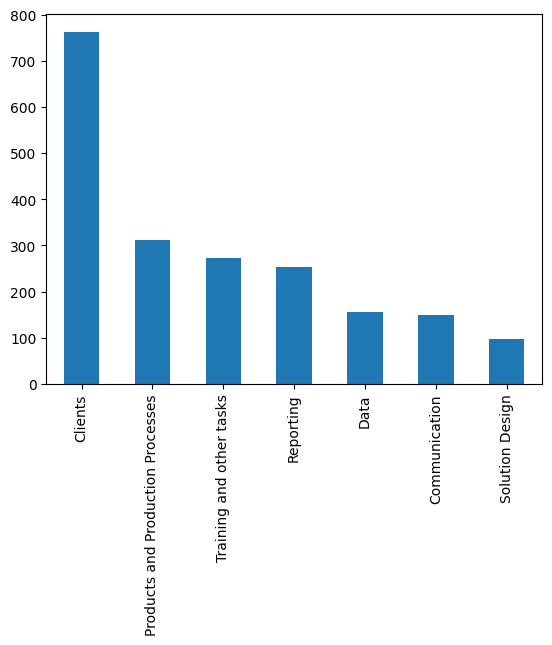

In [1961]:
jd_ba_group = list(itertools.chain(*label_ba_group['jd'].tolist()))
pd.Series(jd_ba_group).value_counts().plot(kind='bar')

In [1962]:
# token_df_ba_group.to_csv('/Users/hoanglan/Desktop/Lan/Side_Project/BA.csv') 

### DA and BI Group

In [1963]:
token_df_da_bi_group['class'] = token_df_da_bi_group['token'].apply(lambda x: classify_jd(x.lower(), label_ver1))
token_df_da_bi_group.loc[token_df_da_bi_group['class'].notna()]

token  \
0     Creating the dashboards/reports for Operations...   
1     Evaluate and define business metrics to improv...   
2                   Consult business stakeholders (e.g.   
3     Business Development, Operation Excellence, et...   
4     Creating and enforcing policies for effective ...   
...                                                 ...   
1476  Collect, analyze and improve analytical indica...   
1477  depth knowledge, grasp trends and abnormalitie...   
1481  identify needs based on data, thereby performi...   
1482  Consulting + Support (40%) %) · Participate in...   
1483  · Support departments with calculations and da...   

                                                  class  
0       {'C': ['business'], 'R': ['report', 'reports']}  
1                 {'C': ['business'], 'P': ['project']}  
2                    {'C': ['business', 'stakeholder']}  
3     {'C': ['business'], 'D': ['data'], 'O': ['task...  
4                                       {'D': ['data']}  
...                                                 ...  
1476                         {'D': ['data', 'collect']}  
1477                                   {'P': ['guide']}  
1481                                    {'D': ['data']}  
1482  {'D': ['data'], 'R': ['report', 'reports', 'pr...  
1483  {'C': ['business'], 'D': ['data'], 'S': ['solu...  

[620 rows x 2 columns]

In [1964]:
count_per = token_df_da_bi_group.query('token.str.len() > 2')
len(count_per)/len(token_df_da_bi_group)

0.8146900269541779

In [1965]:
label_da_bi_group = token_df_da_bi_group.loc[token_df_da_bi_group['class'].notna()]
label_da_bi_group['jd'] = label_da_bi_group['class'].apply(lambda x: jd_list(x)[0])
label_da_bi_group['jd_group'] = label_da_bi_group['class'].apply(lambda x: jd_list(x)[1])

<Axes: >

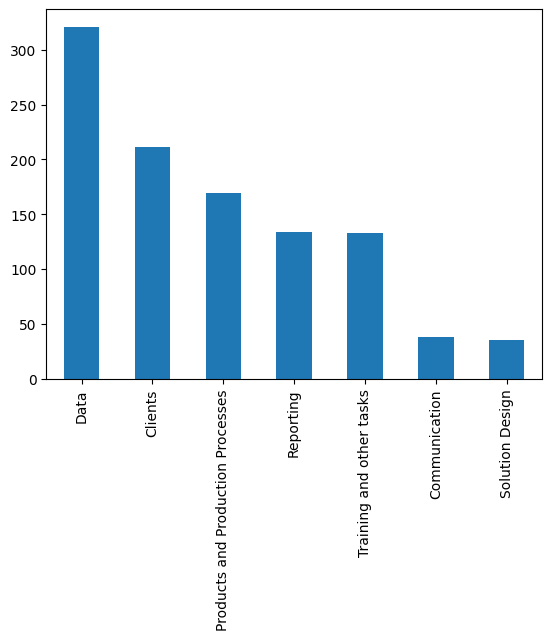

In [1966]:
jd_da_bi_group = list(itertools.chain(*label_da_bi_group['jd'].tolist()))
pd.Series(jd_da_bi_group).value_counts().plot(kind='bar')

### DE Group

In [1967]:
token_df_de_group['class'] = token_df_de_group['token'].apply(lambda x: classify_jd(x.lower(), label_ver1))
token_df_de_group.loc[token_df_de_group['class'].notna()]

token  \
0     Structure, setup, maintenance, and monitoring ...   
2     • Participate in developing big data managemen...   
3     • Participate in optimal performance for data ...   
4     • Handle medium to difficult requirements in t...   
5     • Provide solutions ideas for improving perfor...   
...                                                 ...   
1038   Design detailed solutions for streams Collect...   
1040                            Coordinate and support    
1041                                              Data    
1042  Scientist in converting models, machine learni...   
1043   Design solutions and directly develop modules...   

                                                  class  
0                                     {'P': ['system']}  
2                                       {'D': ['data']}  
3                                       {'D': ['data']}  
4             {'C': ['requirements'], 'P': ['project']}  
5     {'P': ['system'], 'S': ['solution', 'solutions']}  
...                                                 ...  
1038  {'D': ['data', 'collect'], 'S': ['solution', '...  
1040                                 {'O': ['support']}  
1041                                    {'D': ['data']}  
1042  {'D': ['data', 'model', 'models'], 'P': ['soft...  
1043                   {'S': ['solution', 'solutions']}  

[401 rows x 2 columns]

In [1968]:
count_per = token_df_de_group.query('token.str.len() > 2')
len(count_per)/len(token_df_de_group)

0.754066985645933

In [1969]:
label_de_group = token_df_de_group.loc[token_df_de_group['class'].notna()]
label_de_group['jd'] = label_de_group['class'].apply(lambda x: jd_list(x)[0])
label_de_group['jd_group'] = label_de_group['class'].apply(lambda x: jd_list(x)[1])

<Axes: >

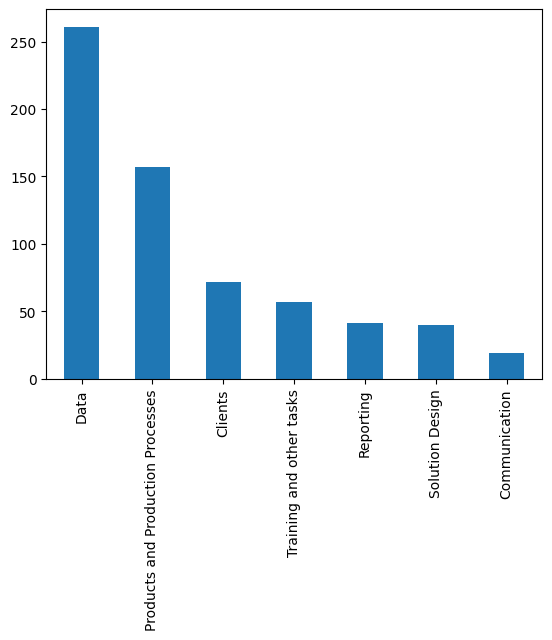

In [1970]:
jd_de_group = list(itertools.chain(*label_de_group['jd'].tolist()))
pd.Series(jd_de_group).value_counts().plot(kind='bar')

### DS ML AI Group

In [1971]:
token_df_ds_ml_ai_group['class'] = token_df_ds_ml_ai_group['token'].apply(lambda x: classify_jd(x.lower(), label_ver1))
token_df_ds_ml_ai_group.loc[token_df_ds_ml_ai_group['class'].notna()]

token  \
0    Responsible for building the ML/AI models to a...   
2    Work on NLP (Natural Language Processing) capa...   
3    Monitor and develop evaluation strategies for ...   
4    Identify and validate business use cases that ...   
5    - Support specialized lecturers in searching, ...   
..                                                 ...   
297   Build, validate and deploy machine learning a...   
299            sell, Customer Churn Prediction, etc.).   
301   Collaborate with engineering and product deve...   
303   Provide technical sharing/training to team me...   
309   Unique culture with many exciting activities:...   

                                                 class  
0         {'D': ['model', 'models'], 'P': ['product']}  
2    {'D': ['model', 'models'], 'P': ['product'], '...  
3                                     {'D': ['model']}  
4                   {'C': ['business'], 'P': ['test']}  
5                                   {'O': ['support']}  
..                                                 ...  
297  {'C': ['customer', 'business'], 'D': ['model',...  
299                                {'C': ['customer']}  
301          {'P': ['product', 'product development']}  
303                                {'O': ['training']}  
309                                {'O': ['training']}  

[136 rows x 2 columns]

In [1972]:
count_per = token_df_ds_ml_ai_group.query('token.str.len() > 2')
len(count_per)/len(token_df_ds_ml_ai_group)

0.8594249201277955

In [1973]:
label_temp_1 = token_df_ds_ml_ai_group.loc[token_df_ds_ml_ai_group['class'].notna()]
label_temp_1

token  \
0    Responsible for building the ML/AI models to a...   
2    Work on NLP (Natural Language Processing) capa...   
3    Monitor and develop evaluation strategies for ...   
4    Identify and validate business use cases that ...   
5    - Support specialized lecturers in searching, ...   
..                                                 ...   
297   Build, validate and deploy machine learning a...   
299            sell, Customer Churn Prediction, etc.).   
301   Collaborate with engineering and product deve...   
303   Provide technical sharing/training to team me...   
309   Unique culture with many exciting activities:...   

                                                 class  
0         {'D': ['model', 'models'], 'P': ['product']}  
2    {'D': ['model', 'models'], 'P': ['product'], '...  
3                                     {'D': ['model']}  
4                   {'C': ['business'], 'P': ['test']}  
5                                   {'O': ['support']}  
..                                                 ...  
297  {'C': ['customer', 'business'], 'D': ['model',...  
299                                {'C': ['customer']}  
301          {'P': ['product', 'product development']}  
303                                {'O': ['training']}  
309                                {'O': ['training']}  

[136 rows x 2 columns]

In [1974]:
def jd_list(class_):
    global class_dict

    jd_code = list(class_.keys())
    jd = class_dict.loc[class_dict['code'].isin(jd_code)]['jd'].tolist()
    jd_group = class_dict.loc[class_dict['code'].isin(jd_code)]['jd_group'].tolist()
    
    return jd, jd_group

label_temp_1['jd'] = label_temp_1['class'].apply(lambda x: jd_list(x)[0])
label_temp_1['jd_group'] = label_temp_1['class'].apply(lambda x: jd_list(x)[1])